# PARTE 1: Análisis de la base de hogares y tipo de ocupación


# Ejercicio 1

In [ ]:
# Importamos librerias necesarias
!pip install --upgrade pandas pyreadstat

import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive

### Cargamos las bases

In [ ]:
hogar_2004 = pd.read_stata("/content/Hogar_t104.dta") # leemos archivo 2004
# Verificar que se cargó correctamente
print(hogar_2004.shape)  # Muestra el número de filas y columnas

(12816, 88)


In [ ]:
hogar_2024 = pd.read_excel('/content/usu_hogar_T124.xlsx') # leemos archivo 2024
# Verificar que se cargó correctamente
print(hogar_2024.shape)  # Muestra el número de filas y columnas

(16104, 88)


In [ ]:
individual_2004 = pd.read_stata('/content/Individual_t104.dta') # leemos archivo 2024
# Verificar que se cargó correctamente
print(individual_2004.shape)  # Muestra el número de filas y columnas

(45289, 176)


In [ ]:
individual_2024 = pd.read_excel('/content/usu_individual_T124.xlsx') # leemos archivo 2024
# Verificar que se cargó correctamente
print(individual_2024.shape)  # Muestra el número de filas y columnas

(46050, 177)


### Dropeamos != Gran Buenos Aires


In [ ]:
hogar_2004_df= hogar_2004.drop(hogar_2004[hogar_2004["region"] != "Gran Buenos Aires"].index, axis=0) # eliminamos datos que no corresponden a GCBA

# Contar la cantidad de datos que quedaron después del filtrado
print(f"Cantidad de datos después del filtrado: {len(hogar_2004_df)}")

Cantidad de datos después del filtrado: 2351


In [ ]:
hogar_2024_df=hogar_2024.drop(hogar_2024[hogar_2024["REGION"] != 1].index, axis=0) # eliminamos datos que no corresponden a GCBA

# Contar la cantidad de datos que quedaron después del filtrado
print(f"Cantidad de datos después del filtrado: {len(hogar_2024_df)}")

Cantidad de datos después del filtrado: 2545


In [ ]:
individual_2004_df= individual_2004.drop(individual_2004[individual_2004["region"] != "Gran Buenos Aires"].index, axis=0) # eliminamos datos que no corresponden a GCBA

# Contar la cantidad de datos que quedaron después del filtrado
print(f"Cantidad de datos después del filtrado: {len(individual_2004_df)}")

Cantidad de datos después del filtrado: 7647


In [ ]:
individual_2024_df= individual_2024.drop(individual_2024[individual_2024["REGION"] != 1].index, axis=0) # eliminamos datos que no corresponden a GCBA

# Contar la cantidad de datos que quedaron después del filtrado
print(f"Cantidad de datos después del filtrado: {len(individual_2024_df)}")

Cantidad de datos después del filtrado: 7051


# Ejercicio 2

### merge 2004

In [ ]:
# Cambiar los nombres de las columnas a minúsculas
individual_2004_df.columns = individual_2004_df.columns.str.lower()
hogar_2004_df.columns = hogar_2004_df.columns.str.lower()

In [ ]:
df_merge04 = pd.merge(individual_2004_df, hogar_2004_df, on=['codusu', 'nro_hogar'], how='outer')

### Merge 2024

In [ ]:
# Cambiar los nombres de las columnas a minúsculas
individual_2024_df.columns = individual_2024_df.columns.str.lower()
hogar_2024_df.columns = hogar_2024_df.columns.str.lower()

In [ ]:
df_merge24 = pd.merge(individual_2024_df, hogar_2024_df, on=['codusu', 'nro_hogar'], how='outer')

# Ejercicio 3

In [ ]:
# Decidimos seleccionar algunas columnas relevantes
columnas_seleccionadas = ['ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'nivel_ed', 'estado', 'cat_inac', "v5","v6","v12","v15","ix_tot", "iv1","iv2","iv5","iv6", "iv8", "iv12_3", "ii1",  "codusu"] # agregamos ch09
df_merge04 = df_merge04[columnas_seleccionadas]
df_merge24 = df_merge24[columnas_seleccionadas]

## datos duplicados

In [ ]:
# Contar datos antes de eliminar duplicados
datos_antes = len(df_merge04)

# Eliminar filas duplicadas basadas en todas las columnas
df_merge04 = df_merge04.drop_duplicates()

# Contar datos después de eliminar duplicados
datos_despues = len(df_merge04)

# Calcular y mostrar la cantidad de datos que se pierden
datos_perdidos = datos_antes - datos_despues
print(f"Cantidad de datos eliminados por duplicados: {datos_perdidos}")

# Restablecer el índice después de eliminar duplicados (opcional)
df_merge04 = df_merge04.reset_index(drop=True)


Cantidad de datos eliminados por duplicados: 15


In [ ]:
# Contar datos antes de eliminar duplicados
datos_antes24 = len(df_merge24)

# Eliminar filas duplicadas basadas en todas las columnas
df_merge24 = df_merge24.drop_duplicates()

# Contar datos después de eliminar duplicados
datos_despues24 = len(df_merge24)

# Calcular y mostrar la cantidad de datos que se pierden
datos_perdidos24 = datos_antes24 - datos_despues24
print(f"Cantidad de datos eliminados por duplicados: {datos_perdidos24}")

# Restablecer el índice después de eliminar duplicados (opcional)
df_merge24 = df_merge24.reset_index(drop=True)


Cantidad de datos eliminados por duplicados: 32


## Datos faltantes  NS/nr

In [ ]:
df_merge04.isna().sum() #contamos NA
df_merge24.isna().sum() #contamos NA

,0
ch04,0
ch06,0
ch07,0
ch08,0
ch09,0
nivel_ed,0
estado,0
cat_inac,0
v5,0
v6,0


#### 2004

In [ ]:
# DATOS FALTANTES Y NS/NR

df_merge04.isna().sum() #contamos NA

# evaluamos si en cada columnas hay datos clasificados como Ns/Nr
def evaluar_ns_nr(df):
    """
    Evalúa cada columna del DataFrame para verificar si hay algún valor 'Ns./Nr.'.
    """
    for columna in df.columns:
        if df[columna].isin(["Ns./Nr.", "NS./NR.", 0]).any():
            print(f"La columna '{columna}' CONTIENE {len(df[df[columna] == 'Ns./Nr.'])} datos 'Ns./Nr.'.")
        else:
            print(f"La columna '{columna}' no contiene datos 'Ns./Nr.'.")

evaluar_ns_nr(df_merge04)

La columna 'ch04' no contiene datos 'Ns./Nr.'.
La columna 'ch06' no contiene datos 'Ns./Nr.'.
La columna 'ch07' no contiene datos 'Ns./Nr.'.
La columna 'ch08' CONTIENE 11 datos 'Ns./Nr.'.
La columna 'ch09' CONTIENE 3 datos 'Ns./Nr.'.
La columna 'nivel_ed' no contiene datos 'Ns./Nr.'.
La columna 'estado' no contiene datos 'Ns./Nr.'.
La columna 'cat_inac' CONTIENE 0 datos 'Ns./Nr.'.
La columna 'v5' CONTIENE 4 datos 'Ns./Nr.'.
La columna 'v6' CONTIENE 4 datos 'Ns./Nr.'.
La columna 'v12' CONTIENE 4 datos 'Ns./Nr.'.
La columna 'v15' CONTIENE 4 datos 'Ns./Nr.'.
La columna 'ix_tot' no contiene datos 'Ns./Nr.'.
La columna 'iv1' no contiene datos 'Ns./Nr.'.
La columna 'iv2' no contiene datos 'Ns./Nr.'.
La columna 'iv5' CONTIENE 7 datos 'Ns./Nr.'.
La columna 'iv6' CONTIENE 0 datos 'Ns./Nr.'.
La columna 'iv8' CONTIENE 0 datos 'Ns./Nr.'.
La columna 'iv12_3' CONTIENE 0 datos 'Ns./Nr.'.
La columna 'ii1' CONTIENE 0 datos 'Ns./Nr.'.
La columna 'codusu' no contiene datos 'Ns./Nr.'.


In [ ]:
# Columnas a evaluar para valores '9'
columnas_a_evaluar = ["ch08", "ch09", "v5", "v6", "v12", "v15", "iv12_3", "iv8"] # NO filtramos en 'ch06', 'ii1', 'ix_tot' porque son numericas

for columna in columnas_seleccionadas:
    # Filtrar filas donde el valor sea 'Ns./Nr.'
    cantidad_na = len(df_merge04[df_merge04[columna] == "Ns./Nr."])
    total = len(df_merge04[columna])

    # Filtrar filas donde el valor sea 0
    cantidad_0 = len(df_merge04[df_merge04[columna] == "Ns./Nr."])
    total = len(df_merge04[columna])

    # Imprimir resultados
    print(f"La cantidad de NA en {columna} es {cantidad_na}")
    print(f"La proporción de NA en {columna} es {cantidad_na / total:.4f}")

    print(f"La cantidad de 0 en {columna} es {cantidad_0}")
    print(f"La proporción de 0 en {columna} es {cantidad_0 / total:.4f}\n")

    # Filtrar el DataFrame para eliminar filas con valor '9' en esta columna
    df_merge04 = df_merge04[df_merge04[columna] != "Ns./Nr."]
    df_merge04 = df_merge04[df_merge04[columna] != "Ns./Nr."]

La cantidad de NA en ch04 es 0
La proporción de NA en ch04 es 0.0000
La cantidad de 0 en ch04 es 0
La proporción de 0 en ch04 es 0.0000

La cantidad de NA en ch06 es 0
La proporción de NA en ch06 es 0.0000
La cantidad de 0 en ch06 es 0
La proporción de 0 en ch06 es 0.0000

La cantidad de NA en ch07 es 0
La proporción de NA en ch07 es 0.0000
La cantidad de 0 en ch07 es 0
La proporción de 0 en ch07 es 0.0000

La cantidad de NA en ch08 es 11
La proporción de NA en ch08 es 0.0014
La cantidad de 0 en ch08 es 11
La proporción de 0 en ch08 es 0.0014

La cantidad de NA en ch09 es 2
La proporción de NA en ch09 es 0.0003
La cantidad de 0 en ch09 es 2
La proporción de 0 en ch09 es 0.0003

La cantidad de NA en nivel_ed es 0
La proporción de NA en nivel_ed es 0.0000
La cantidad de 0 en nivel_ed es 0
La proporción de 0 en nivel_ed es 0.0000

La cantidad de NA en estado es 0
La proporción de NA en estado es 0.0000
La cantidad de 0 en estado es 0
La proporción de 0 en estado es 0.0000

La cantidad de 

####2024

In [ ]:
def evaluar_9(df):
    """
    Evalúa cada columna del DataFrame para verificar si hay algún valor 9 ('Ns./Nr.' o 'NS./NR.').
    """
    for columna in df.columns:
      try:
        num_valores_9 = (df[columna] == 9).sum()  # Contar valores igual a 9
        if num_valores_9 > 0:
          print(f"La columna '{columna}' CONTIENE {num_valores_9} datos '9' ('Ns./Nr.').")
        else:
          print(f"La columna '{columna}' no contiene datos '9'.")
      except Exception as e:
        print(f"No se pudo evaluar la columna '{columna}' debido a: {e}")

# Llamamos a la función para evaluar
evaluar_9(df_merge24)

La columna 'ch04' no contiene datos '9'.
La columna 'ch06' CONTIENE 106 datos '9' ('Ns./Nr.').
La columna 'ch07' CONTIENE 10 datos '9' ('Ns./Nr.').
La columna 'ch08' CONTIENE 22 datos '9' ('Ns./Nr.').
La columna 'ch09' CONTIENE 9 datos '9' ('Ns./Nr.').
La columna 'nivel_ed' no contiene datos '9'.
La columna 'estado' no contiene datos '9'.
La columna 'cat_inac' no contiene datos '9'.
La columna 'v5' CONTIENE 25 datos '9' ('Ns./Nr.').
La columna 'v6' CONTIENE 25 datos '9' ('Ns./Nr.').
La columna 'v12' CONTIENE 25 datos '9' ('Ns./Nr.').
La columna 'v15' CONTIENE 25 datos '9' ('Ns./Nr.').
La columna 'ix_tot' CONTIENE 78 datos '9' ('Ns./Nr.').
La columna 'iv1' no contiene datos '9'.
La columna 'iv2' no contiene datos '9'.
La columna 'iv5' no contiene datos '9'.
La columna 'iv6' no contiene datos '9'.
La columna 'iv8' no contiene datos '9'.
La columna 'iv12_3' no contiene datos '9'.
La columna 'ii1' CONTIENE 1 datos '9' ('Ns./Nr.').
La columna 'codusu' no contiene datos '9'.


In [ ]:
# Columnas a evaluar para valores '9'
columnas_a_evaluar = ["ch07", "ch08", "ch09", "v5", "v6", "v12", "v15", "iv12_3", "iv8"] # NO filtramos en 'ch06', 'ii1', 'ix_tot' porque son numericas

for columna in columnas_a_evaluar:
    # Filtrar filas donde el valor sea '9'
    cantidad_na = len(df_merge24[df_merge24[columna] == 9])
    total = len(df_merge24[columna])

    # Filtrar filas donde el valor sea 0
    cantidad_0 = len(df_merge24[df_merge24[columna] == 0])
    total = len(df_merge24[columna])

    # Imprimir resultados
    print(f"La cantidad de NA en {columna} es {cantidad_na}")
    print(f"La proporción de NA en {columna} es {cantidad_na / total:.4f}")

    print(f"La cantidad de 0 en {columna} es {cantidad_0}")
    print(f"La proporción de 0 en {columna} es {cantidad_0 / total:.4f}\n")

    # Filtrar el DataFrame para eliminar filas con valor '9' en esta columna
    df_merge24 = df_merge24[df_merge24[columna] != 9]
    df_merge24 = df_merge24[df_merge24[columna] != 0]

La cantidad de NA en ch07 es 10
La proporción de NA en ch07 es 0.0014
La cantidad de 0 en ch07 es 0
La proporción de 0 en ch07 es 0.0000

La cantidad de NA en ch08 es 13
La proporción de NA en ch08 es 0.0019
La cantidad de 0 en ch08 es 0
La proporción de 0 en ch08 es 0.0000

La cantidad de NA en ch09 es 2
La proporción de NA en ch09 es 0.0003
La cantidad de 0 en ch09 es 0
La proporción de 0 en ch09 es 0.0000

La cantidad de NA en v5 es 20
La proporción de NA en v5 es 0.0029
La cantidad de 0 en v5 es 0
La proporción de 0 en v5 es 0.0000

La cantidad de NA en v6 es 0
La proporción de NA en v6 es 0.0000
La cantidad de 0 en v6 es 0
La proporción de 0 en v6 es 0.0000

La cantidad de NA en v12 es 0
La proporción de NA en v12 es 0.0000
La cantidad de 0 en v12 es 0
La proporción de 0 en v12 es 0.0000

La cantidad de NA en v15 es 0
La proporción de NA en v15 es 0.0000
La cantidad de 0 en v15 es 0
La proporción de 0 en v15 es 0.0000

La cantidad de NA en iv12_3 es 0
La proporción de NA en iv12_3

## valores inusuales y outiliers


#### Edad

In [ ]:
df_merge04["ch06"]

,ch06
0,80.0
1,75.0
2,79.0
3,72.0
4,66.0
...,...
7627,1.0
7628,51.0
7629,55.0
7630,12.0


In [ ]:
df_merge24["ch06"].unique()

array([57, 52, 22, 75, 41, 48,  6, 49, 66, 65, 32, 46, 44,  5, 37,  3, 68,
       61, 70, 26, 30, 67, 54, 16, 82, 73, 71, 35, 53, 25, 23, 20, 87, 36,
       42, 10,  8,  2, 64, 33, 12, 77, 86, 39, 21, 19, 13,  1, 60, 50, 51,
       74, 31, 29,  7, 18, 14, 59, 47, 79, 24, 58, 63, 91, -1, 34, 40, 56,
       45, 80, 17, 15, 55, 93, 83,  4, 43, 11,  9, 76, 27, 88, 69, 85, 28,
       72, 84, 62, 92, 38, 89, 78, 97, 81, 90, 96, 94, 95])

In [ ]:
# Convertimos todos los valores de "CH06" a numéricos en 2004
df_merge04["ch06"] = df_merge04["ch06"].replace({"Menos de 1 año": 1, "98 y más años": 98})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98

# Convertimos la columna a numérica para asegurar la consistencia de los datos
df_merge04["ch06"] = df_merge04["ch06"].astype(int)

<ipython-input-24-cf769537fece>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merge04["ch06"] = df_merge04["ch06"].replace({"Menos de 1 año": 1, "98 y más años": 98})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98
<ipython-input-24-cf769537fece>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_merge04["ch06"] = df_merge04["ch06"].replace({"Menos de 1 año": 1, "98 y más años": 98})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98


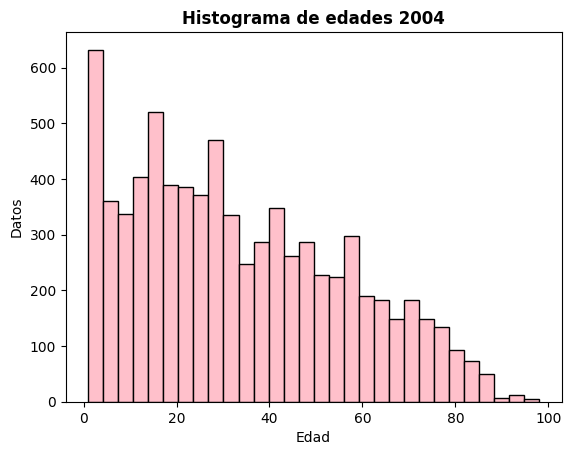

Los datos menores a 0 son 0
Esto representa un 0.0% de los datos


In [ ]:
# Observamos ch06 (edad) en 2004
plt.hist(df_merge04["ch06"],bins=30, edgecolor='black', color='pink')
plt.xlabel('Edad')
plt.ylabel('Datos')
plt.title("Histograma de edades 2004", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_merge04[df_merge04['ch06']<0])}")
print(f"Esto representa un {len(df_merge04[df_merge04['ch06']<0]) / len(df_merge04)*100}% de los datos")

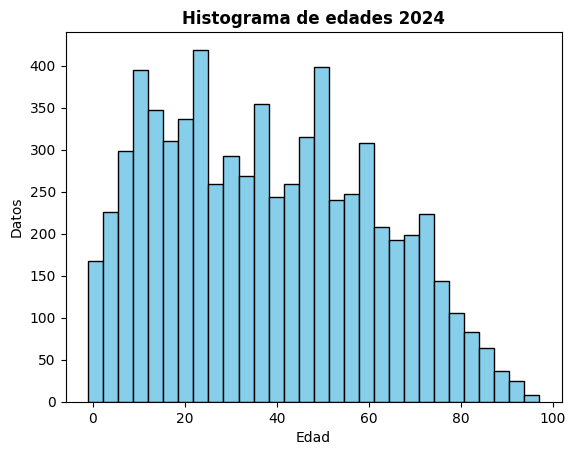

Los datos menores a 0 son 49
Esto representa un 0.7026096931459708% de los datos


In [ ]:
# Observamos ch06 (edad) en 2024
plt.hist(df_merge24["ch06"],bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Datos')
plt.title("Histograma de edades 2024", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_merge24[df_merge24['ch06']<0])}")
print(f"Esto representa un {len(df_merge24[df_merge24['ch06']<0]) / len(df_merge24)*100}% de los datos")

In [ ]:
# filtramos valores negativos
df_merge24 = df_merge24[df_merge24['ch06']>0]

#### ii1

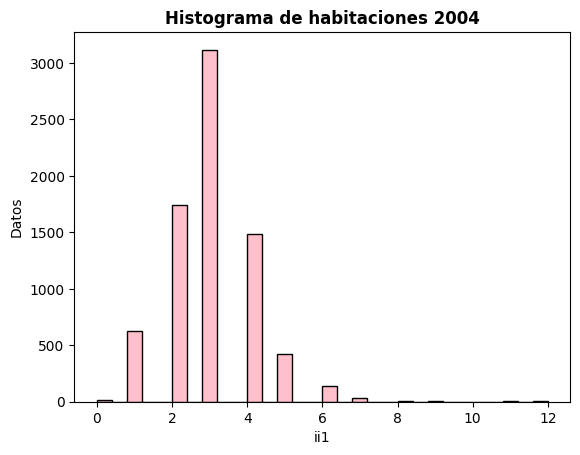

Los datos menores a 0 son 0
Esto representa un 0.0% de los datos


In [ ]:
# Observamos ii1 en 2004
plt.hist(df_merge04["ii1"],bins=30, edgecolor='black', color='pink')
plt.xlabel('ii1')
plt.ylabel('Datos')
plt.title("Histograma de habitaciones 2004", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_merge04[df_merge04['ii1']<0])}")
print(f"Esto representa un {len(df_merge04[df_merge04['ii1']<0]) / len(df_merge04)*100}% de los datos")

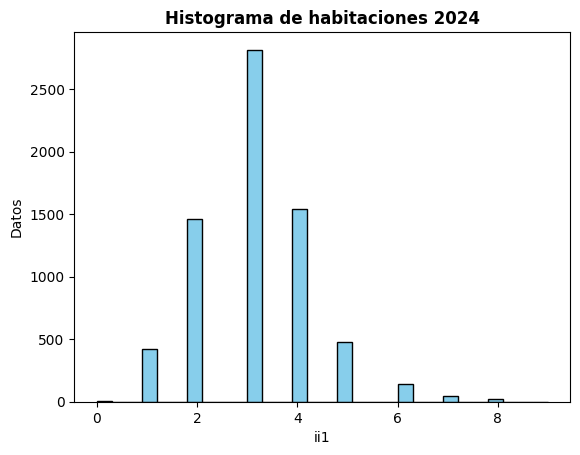

Los datos menores a 0 son 0
Esto representa un 0.0% de los datos


In [ ]:
# Observamos ii1 en 2024
plt.hist(df_merge24["ii1"],bins=30, edgecolor='black', color='skyblue')
plt.xlabel('ii1')
plt.ylabel('Datos')
plt.title("Histograma de habitaciones 2024", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_merge24[df_merge24['ii1']<0])}")
print(f"Esto representa un {len(df_merge24[df_merge24['ii1']<0]) / len(df_merge24)*100}% de los datos")

#### ix_tot

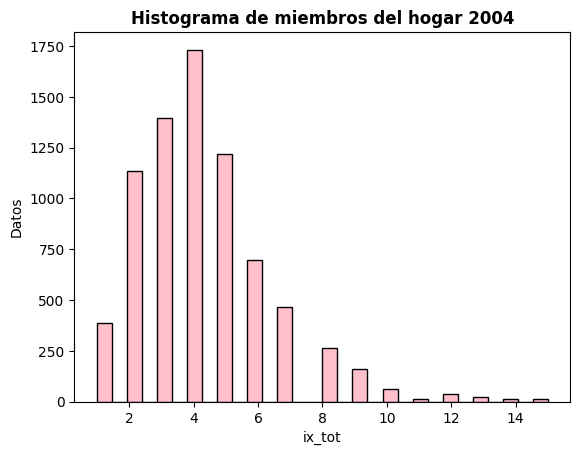

Los datos menores a 0 son 0
Esto representa un 0.0% de los datos


In [ ]:
# Observamos ix_tot en 2004
plt.hist(df_merge04["ix_tot"],bins=30, edgecolor='black', color='pink')
plt.xlabel('ix_tot')
plt.ylabel('Datos')
plt.title("Histograma de miembros del hogar 2004", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_merge04[df_merge04['ix_tot']<0])}")
print(f"Esto representa un {len(df_merge04[df_merge04['ix_tot']<0]) / len(df_merge04)*100}% de los datos")

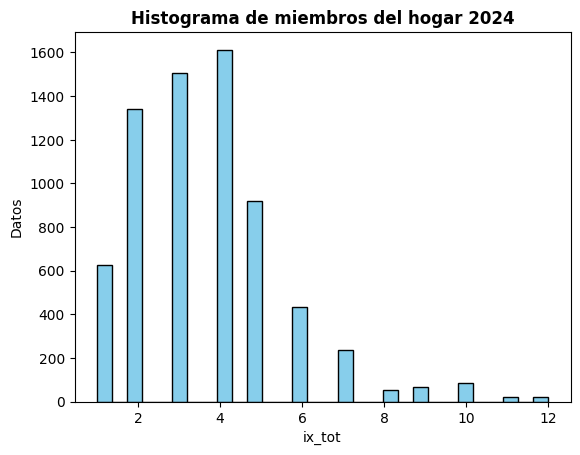

Los datos menores a 0 son 0
Esto representa un 0.0% de los datos


In [ ]:
# Observamos ii1 en 2024
plt.hist(df_merge24["ix_tot"],bins=30, edgecolor='black', color='skyblue')
plt.xlabel('ix_tot')
plt.ylabel('Datos')
plt.title("Histograma de miembros del hogar 2024", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_merge24[df_merge24['ix_tot']<0])}")
print(f"Esto representa un {len(df_merge24[df_merge24['ix_tot']<0]) / len(df_merge24)*100}% de los datos")

## Encoding binarias

#### 2004


In [ ]:
def columnas_binarias(df, columnas):
    """
    Identifica columnas binarias (con exactamente dos valores únicos) en un DataFrame.
    """
    columnas_binarias = []
    for columna in columnas:
        # Obtenemos los valores únicos no nulos de la columna
        valores_unicos = df[columna].unique()

        # Si la columna tiene exactamente dos valores únicos, se considera binaria
        if len(valores_unicos) == 2:
            columnas_binarias.append(columna)

    return columnas_binarias

In [ ]:
# lista de columans
columnas_evaluar_binarias = df_merge04.columns.tolist()
columnas_evaluar_binarias

['ch04',
 'ch06',
 'ch07',
 'ch08',
 'ch09',
 'nivel_ed',
 'estado',
 'cat_inac',
 'v5',
 'v6',
 'v12',
 'v15',
 'ix_tot',
 'iv1',
 'iv2',
 'iv5',
 'iv6',
 'iv8',
 'iv12_3',
 'ii1',
 'codusu']

In [ ]:
# seleccionar binarias
columnas_binarias(df_merge04, columnas_evaluar_binarias)

['ch04', 'v5', 'v12', 'v15', 'iv5']

In [ ]:
# Lista de columnas a transformar (Si/No)
columnas_si_no = ['v5', 'v6', 'v12', 'v15', 'iv5', 'iv8', 'iv12_3']

# Transformar columnas en el DataFrame
for columna in columnas_si_no:
    if columna in df_merge04.columns:
        # Verificar si la columna es categórica
        if isinstance(df_merge04[columna].dtype, pd.CategoricalDtype):
            # Convertir las categorías a strings y asegurarnos de que sean únicas
            df_merge04[columna] = df_merge04[columna].astype(str).str.strip()

            # Reemplazar valores categóricos a binarios
            df_merge04[columna] = df_merge04[columna].replace({'Si': 1, 'Sí': 1, 'No': 0})
        else:
            # Si no es categórica, hacer el reemplazo directamente
            df_merge04[columna] = df_merge04[columna].replace({'Si': 1, 'Sí': 1, 'No': 0})

        # Convertir los valores finales a tipo entero
        df_merge04[columna] = pd.to_numeric(df_merge04[columna], errors='coerce').fillna(0).astype(int)

# Verificar el resultado
print(df_merge04[columnas_si_no].head())


   v5  v6  v12  v15  iv5  iv8  iv12_3
0   0   0    0    0    1    1       0
1   0   0    0    0    1    1       0
2   0   0    0    0    1    1       0
3   0   0    0    0    1    1       0
4   0   0    0    0    1    1       0


<ipython-input-35-5b5307bb5dbc>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merge04[columna] = df_merge04[columna].replace({'Si': 1, 'Sí': 1, 'No': 0})
<ipython-input-35-5b5307bb5dbc>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merge04[columna] = df_merge04[columna].replace({'Si': 1, 'Sí': 1, 'No': 0})
<ipython-input-35-5b5307bb5dbc>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [ ]:
# Mapeo para la columna "ch04" (Sexo)
ch04_mapping = {
    "Varón":0,
    "Mujer":1
}
df_merge04["ch04"] = df_merge04["ch04"].replace(ch04_mapping)

<ipython-input-36-a3ad75497da4>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merge04["ch04"] = df_merge04["ch04"].replace(ch04_mapping)
<ipython-input-36-a3ad75497da4>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_merge04["ch04"] = df_merge04["ch04"].replace(ch04_mapping)


#### 2024


In [ ]:
def columnas_binarias(df, columnas):
    """
    Identifica columnas binarias (con exactamente dos valores únicos) en un DataFrame.
    """
    columnas_binarias = []
    for columna in columnas:
        # Obtenemos los valores únicos no nulos de la columna
        valores_unicos = df[columna].unique()

        # Si la columna tiene exactamente dos valores únicos, se considera binaria
        if len(valores_unicos) == 2:
            columnas_binarias.append(columna)

    return columnas_binarias

In [ ]:
# lista de columans
columnas_evaluar_binarias24 = df_merge24.columns.tolist()
columnas_evaluar_binarias24

['ch04',
 'ch06',
 'ch07',
 'ch08',
 'ch09',
 'nivel_ed',
 'estado',
 'cat_inac',
 'v5',
 'v6',
 'v12',
 'v15',
 'ix_tot',
 'iv1',
 'iv2',
 'iv5',
 'iv6',
 'iv8',
 'iv12_3',
 'ii1',
 'codusu']

In [ ]:
# seleccionar binarias
columnas_binarias(df_merge24, columnas_evaluar_binarias24)

['ch04', 'v5', 'v6', 'v12', 'v15', 'iv5', 'iv8', 'iv12_3']

In [ ]:
# Lista de columnas a transformar (2/1)
columnas_si_no = ['ch04', 'v5', 'v6', 'v12', 'v15', 'iv5', 'iv8', 'iv12_3']  # Cambia por tus columnas

# Aplicar el mapeo de 2 a 0 y 1 a 1
for columna in columnas_si_no:
    if isinstance(df_merge24[columna].dtype, pd.CategoricalDtype):
        # Si la columna es categórica, renombramos las categorías
        df_merge24[columna] = df_merge24[columna].cat.rename_categories({
            2: 0,  # Reemplazar 2 por 0
            1: 1   # Dejar 1 igual
        })
    else:
        # Si la columna no es categórica, reemplazamos directamente
        df_merge24[columna] = df_merge24[columna].replace({2: 0, 1: 1})

    # Convertir la columna a tipo binario (int) después del reemplazo
    df_merge24[columna] = df_merge24[columna].astype(int)

# Verificar el resultado
print(df_merge24[columnas_si_no].head())


   ch04  v5  v6  v12  v15  iv5  iv8  iv12_3
0     1   0   0    0    0    1    1       0
1     0   0   0    0    0    1    1       0
2     1   0   0    0    0    1    1       0
3     0   0   0    0    0    1    1       0
4     0   0   0    0    0    1    1       0


# Ejercicio 4


## Maximo nivel educativo hogar

In [ ]:
df_merge04["nivel_ed"].unique()

['Primaria Incompleta (incluye educación especi..., 'Secundaria Incompleta', 'Primaria Completa', 'Secundaria Completa', 'Sin instrucción', 'Superior Universitaria Completa', 'Superior Universitaria Incompleta']
Categories (7, object): ['Primaria Incompleta (incluye educación especi... < 'Primaria Completa' < 'Secundaria Incompleta' <
                         'Secundaria Completa' < 'Superior Universitaria Incompleta' <
                         'Superior Universitaria Completa' < 'Sin instrucción']

In [ ]:
# Modificar directamente las categorías de la columna categórica
df_merge04["nivel_ed"] = df_merge04["nivel_ed"].cat.rename_categories({
    'Primaria Incompleta (incluye educación especial)': 'Primaria Incompleta'
})

In [ ]:
# Maximo nivel educativo hogar

# 2004
# Definir una jerarquía para los niveles educativos
jerarquia_niveles = {
    'Sin instrucción': 0,
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6
}

# Mapear los niveles educativos a valores numéricos
df_merge04['nivel_ed_numeric04'] = df_merge04['nivel_ed'].map(jerarquia_niveles)

# Calcular el nivel educativo máximo por hogar
nivel_maximo_hogar04 = df_merge04.groupby('codusu')['nivel_ed_numeric04'].max().reset_index()

# Renombrar la columna calculada
nivel_maximo_hogar04.rename(columns={'nivel_ed_numeric04': 'nivel_ed_maximo04'}, inplace=True)

# Unir con el DataFrame original
df_merge04 = df_merge04.merge(nivel_maximo_hogar04, on='codusu', how='left')

# Imprimir
print(df_merge04.head())

  ch04  ch06    ch07                        ch08 ch09               nivel_ed  \
0    0    80  Casado  Obra social (incluye PAMI)   Sí    Primaria Incompleta   
1    1    75  Casado  Obra social (incluye PAMI)   Sí    Primaria Incompleta   
2    0    79   Viudo  Obra social (incluye PAMI)   Sí  Secundaria Incompleta   
3    0    72   Unido    No paga ni le descuentan   Sí    Primaria Incompleta   
4    1    66   Unido    No paga ni le descuentan   Sí    Primaria Incompleta   

     estado             cat_inac  v5  v6  ...           iv1  iv2  iv5  \
0  Inactivo  Jubilado/pensionado   0   0  ...  Departamento  3.0    1   
1  Inactivo  Jubilado/pensionado   0   0  ...  Departamento  3.0    1   
2  Inactivo  Jubilado/pensionado   0   0  ...  Departamento  3.0    1   
3   Ocupado                  0.0   0   0  ...          Casa  2.0    1   
4  Inactivo          Ama de casa   0   0  ...          Casa  2.0    1   

                                 iv6 iv8  iv12_3  ii1    codusu  \
0  Por cañerí

In [ ]:
df_merge24["nivel_ed"].unique()

array([5, 3, 6, 2, 1, 4, 7])

In [ ]:
# 2024

# Modificar las categorías de la columna 'nivel_ed'
# Definir una jerarquía para los niveles educativos
jerarquia_niveles_2024 = {
    7: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6
}

# Mapear los niveles educativos a valores numéricos
df_merge24['nivel_ed_numeric2024'] = df_merge24['nivel_ed'].map(jerarquia_niveles_2024)

# Calcular el nivel educativo máximo por hogar
nivel_maximo_hogar24 = df_merge24.groupby('codusu')['nivel_ed_numeric2024'].max().reset_index()

# Renombrar la columna calculada
nivel_maximo_hogar24.rename(columns={'nivel_ed_numeric2024': 'nivel_ed_maximo24'}, inplace=True)

# Unir con el DataFrame original
df_merge24 = df_merge24.merge(nivel_maximo_hogar24, on='codusu', how='left')

# Imprimir el resultado
print(df_merge24.head())

   ch04  ch06  ch07  ch08  ch09  nivel_ed  estado  cat_inac  v5  v6  ...  iv1  \
0     1    57     2     1     1         5       1         0   0   0  ...    1   
1     0    52     2     1     1         3       3         4   0   0  ...    1   
2     1    22     5     1     1         5       1         0   0   0  ...    1   
3     0    52     5     2     1         6       1         0   0   0  ...    1   
4     0    75     4     1     1         2       1         0   0   0  ...    1   

   iv2  iv5  iv6  iv8  iv12_3  ii1                         codusu  \
0    5    1    1    1       0    5  TQRMNOPPQHJNOPCDEIJAH00802435   
1    5    1    1    1       0    5  TQRMNOPPQHJNOPCDEIJAH00802435   
2    5    1    1    1       0    5  TQRMNOPPQHJNOPCDEIJAH00802435   
3    4    1    1    1       0    4  TQRMNOPPQHKKMMCDEIIAD00858017   
4    3    1    1    1       0    3  TQRMNOPPQHKMQUCDEIJAH00861670   

   nivel_ed_numeric2024  nivel_ed_maximo24  
0                     5                  5  
1       

## Indice de ayuda externa

#### 2004

In [ ]:
# Crear el índice de ayuda externa: Sumar los valores de las tres columnas
df_merge04['indice_ayuda_externa04'] = df_merge04['v5'] + df_merge04['v6'] + df_merge04['v12']

# Imprimir las primeras filas para verificar el resultado
print(df_merge04[['v5', 'v6', 'v12', 'indice_ayuda_externa04']].head())

# Contar los valores únicos en la columna 'indice_ayuda_externa04'
print(df_merge04['indice_ayuda_externa04'].value_counts())

   v5  v6  v12  indice_ayuda_externa04
0   0   0    0                       0
1   0   0    0                       0
2   0   0    0                       0
3   0   0    0                       0
4   0   0    0                       0
indice_ayuda_externa04
0    5998
1    1362
2     240
3       8
Name: count, dtype: int64


#### 2024

In [ ]:
# Crear el índice de ayuda externa: Sumar los valores de las tres columnas
df_merge24['indice_ayuda_externa24'] = df_merge24['v5'] + df_merge24['v6'] + df_merge24['v12']

# Imprimir las primeras filas para verificar el resultado
print(df_merge24[['v5', 'v6', 'v12', 'indice_ayuda_externa24']].head())

# Contar los valores únicos en la columna 'indice_ayuda_externa24'
print(df_merge24['indice_ayuda_externa24'].value_counts())

   v5  v6  v12  indice_ayuda_externa24
0   0   0    0                       0
1   0   0    0                       0
2   0   0    0                       0
3   0   0    0                       0
4   0   0    0                       0
indice_ayuda_externa24
0    5042
1    1409
2     411
3      63
Name: count, dtype: int64


## Cantidad de menores de 16 por hogar

#### 2004

In [ ]:
# Crear una nueva columna que indique si la persona es menor de 16 años
df_merge04['menor_de_16'] = (df_merge04['ch06'] < 16).astype(int)

# Calcular la cantidad de menores de 16 por hogar
cantidad_menores_16_por_hogar04 = df_merge04.groupby('codusu')['menor_de_16'].sum().reset_index()

# Renombrar la columna calculada
cantidad_menores_16_por_hogar04.rename(columns={'menor_de_16': 'cantidad_menores_16'}, inplace=True)

# Unir con el DataFrame original para obtener la cantidad de menores de 16 por hogar
df_merge04 = df_merge04.merge(cantidad_menores_16_por_hogar04, on='codusu', how='left')

# Imprimir el resultado
print(df_merge04[['codusu', 'cantidad_menores_16']].head())

     codusu  cantidad_menores_16
0  125047                      0
1  125047                      0
2  125098                      0
3  125169                      2
4  125169                      2


#### 2024

In [ ]:
# Crear una nueva columna que indique si la persona es menor de 16 años
df_merge24['menor_de_16'] = (df_merge24['ch06'] < 16).astype(int)

# Calcular la cantidad de menores de 16 por hogar
cantidad_menores_16_por_hogar24 = df_merge24.groupby('codusu')['menor_de_16'].sum().reset_index()

# Renombrar la columna calculada
cantidad_menores_16_por_hogar24.rename(columns={'menor_de_16': 'cantidad_menores_16'}, inplace=True)

# Unir con el DataFrame original para obtener la cantidad de menores de 16 por hogar
df_merge24 = df_merge24.merge(cantidad_menores_16_por_hogar24, on='codusu', how='left')

# Imprimir el resultado
print(df_merge24[['codusu', 'cantidad_menores_16']].head())


                          codusu  cantidad_menores_16
0  TQRMNOPPQHJNOPCDEIJAH00802435                    0
1  TQRMNOPPQHJNOPCDEIJAH00802435                    0
2  TQRMNOPPQHJNOPCDEIJAH00802435                    0
3  TQRMNOPPQHKKMMCDEIIAD00858017                    0
4  TQRMNOPPQHKMQUCDEIJAH00861670                    0


# Ejercicio 5


In [ ]:
# 2004
# Establecer estilo visual con paleta más suave
sns.set(style="whitegrid")

# Variables de interés para predecir la desocupación
variables_relevantes = ['ch06', 'ch09', 'v5']

# Estadísticas descriptivas de las variables
estadisticas = df_merge04[variables_relevantes].describe(include='all')

print("Estadísticas Descriptivas de Variables Relevantes para Predecir la Desocupación 2004")
print(estadisticas)
print("\n")

# 2024
# Establecer estilo visual con paleta más suave
sns.set(style="whitegrid")

# Estadísticas descriptivas de las variables en df_merge24
estadisticas24 = df_merge24[variables_relevantes].describe(include='all')

print("Estadísticas Descriptivas de Variables Relevantes para Predecir la Desocupación 2024")
print(estadisticas24)

Estadísticas Descriptivas de Variables Relevantes para Predecir la Desocupación 2004
               ch06  ch09           v5
count   7608.000000  7608  7608.000000
unique          NaN     3          NaN
top             NaN    Sí          NaN
freq            NaN  6771          NaN
mean      33.705836   NaN     0.063617
std       22.692941   NaN     0.244086
min        1.000000   NaN     0.000000
25%       15.000000   NaN     0.000000
50%       30.000000   NaN     0.000000
75%       50.000000   NaN     0.000000
max       98.000000   NaN     1.000000


Estadísticas Descriptivas de Variables Relevantes para Predecir la Desocupación 2024
              ch06         ch09           v5
count  6925.000000  6925.000000  6925.000000
mean     38.280433     1.059928     0.183105
std      22.710430     0.266058     0.386780
min       1.000000     1.000000     0.000000
25%      19.000000     1.000000     0.000000
50%      37.000000     1.000000     0.000000
75%      56.000000     1.000000     0.000000


### Nivel educativo grafico

<ipython-input-51-d4d50d343c6b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merge04, x='nivel_ed', order=df_merge04['nivel_ed'].value_counts().index, palette='Set2')


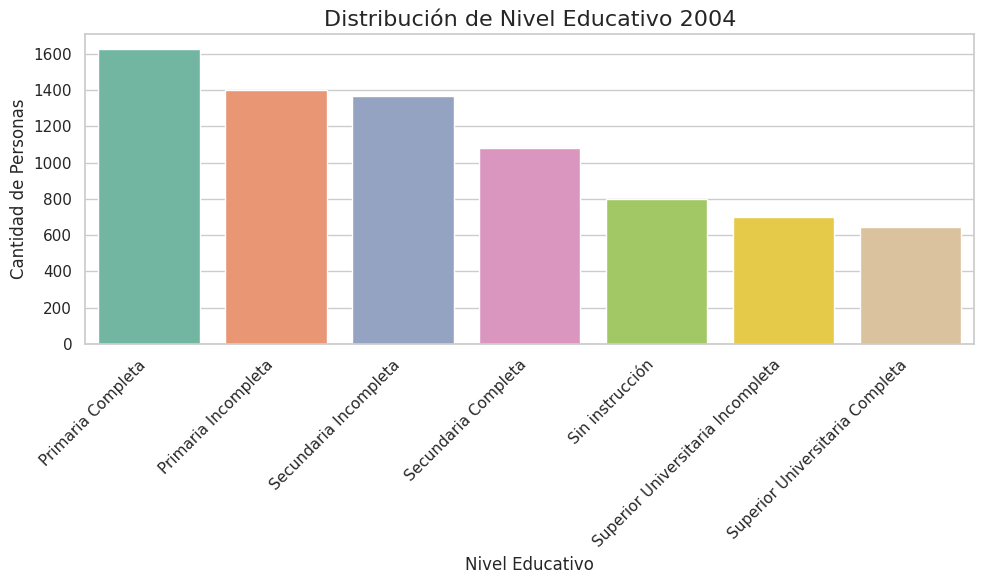

In [ ]:
# Establecer estilo visual con paleta más suave
sns.set(style="whitegrid")

# Crear el gráfico de barras sin el warning
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merge04, x='nivel_ed', order=df_merge04['nivel_ed'].value_counts().index, palette='Set2')

# Añadir título y etiquetas
plt.title('Distribución de Nivel Educativo 2004', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-52-aac30e88f0bd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
<ipython-input-52-aac30e88f0bd>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([diccionario_niveles.get(x, x) for x in sorted(df_merge24['nivel_ed'].unique())])


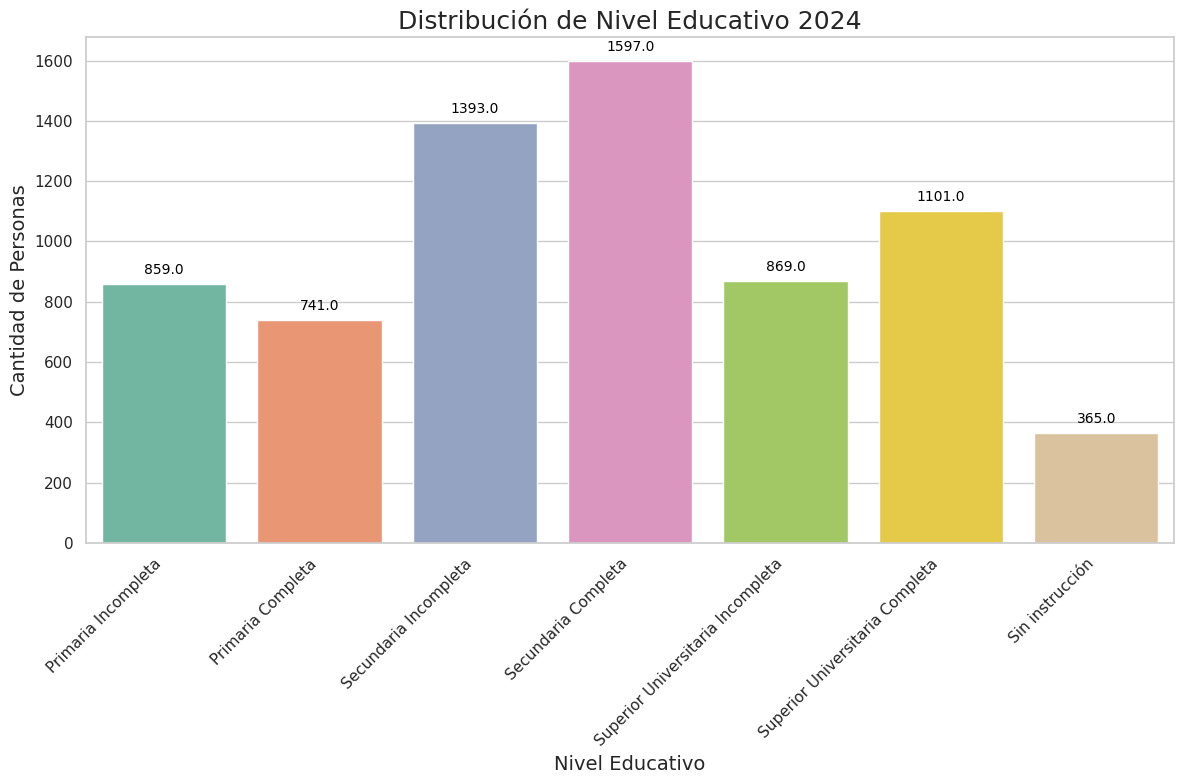

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de valores numéricos y sus etiquetas correspondientes
diccionario_niveles = {
    1: 'Primaria Incompleta',
    2: 'Primaria Completa',
    3: 'Secundaria Incompleta',
    4: 'Secundaria Completa',
    5: 'Superior Universitaria Incompleta',
    6: 'Superior Universitaria Completa',
    7: 'Sin instrucción'
}

# Establecer estilo visual con paleta más suave
sns.set(style="whitegrid")

# Crear el gráfico de barras con orden numérico ascendente
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=df_merge24,
    x='nivel_ed',
    order=sorted(df_merge24['nivel_ed'].unique()),
    palette='Set2'
)

# Añadir las etiquetas con los valores directamente sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # El valor de la barra
                (p.get_x() + p.get_width() / 2., height),  # Coordenadas
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')  # Desplazamiento de la etiqueta

# Reemplazar las etiquetas del eje X con las descripciones del diccionario
ax.set_xticklabels([diccionario_niveles.get(x, x) for x in sorted(df_merge24['nivel_ed'].unique())])

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Nivel Educativo 2024', fontsize=18)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Cantidad de Personas', fontsize=14)

# Rotar etiquetas del eje X a 45 grados para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Edad gráfico

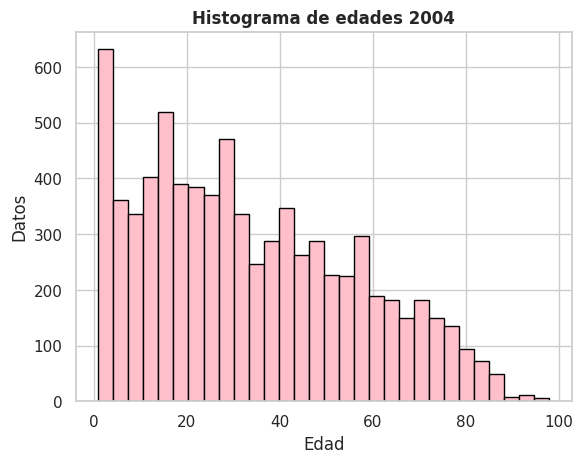

In [ ]:
#2004
plt.hist(df_merge04["ch06"],bins=30, edgecolor='black', color='pink')
plt.xlabel('Edad')
plt.ylabel('Datos')
plt.title("Histograma de edades 2004", fontweight="bold")
# Mostrar el gráfico
plt.show()

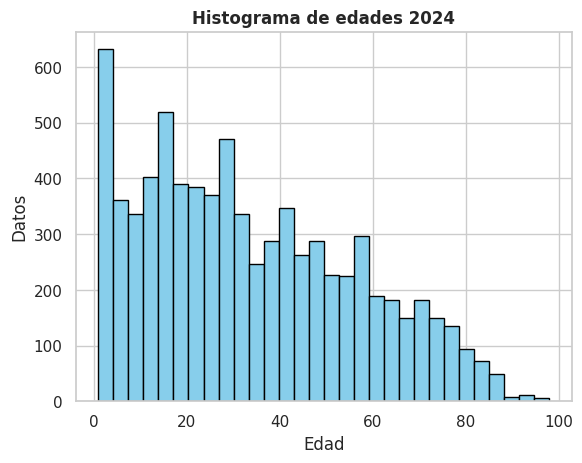

In [ ]:
# Observamos ch06 (edad) en 2024
plt.hist(df_merge04["ch06"],bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Datos')
plt.title("Histograma de edades 2024", fontweight="bold")
# Mostrar el gráfico
plt.show()

<ipython-input-55-bfeb836e9dfb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_merge04['ch06'], label='2004', shade=True, color='blue', alpha=0.5)
<ipython-input-55-bfeb836e9dfb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_merge24['ch06'], label='2024', shade=True, color='red', alpha=0.5)


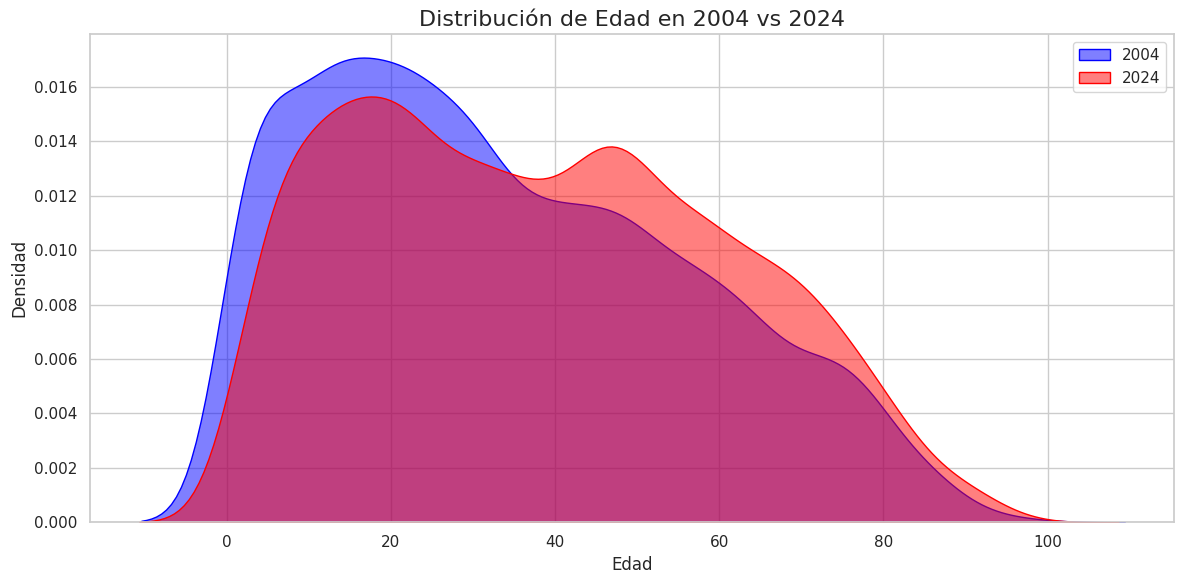

In [ ]:
# Comparar distribuciones de 'ch06' (Edad) entre 2004 y 2024
plt.figure(figsize=(12, 6))
sns.kdeplot(df_merge04['ch06'], label='2004', shade=True, color='blue', alpha=0.5)
sns.kdeplot(df_merge24['ch06'], label='2024', shade=True, color='red', alpha=0.5)
plt.title('Distribución de Edad en 2004 vs 2024', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### alfabetización

<ipython-input-56-6e53916f5fe1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


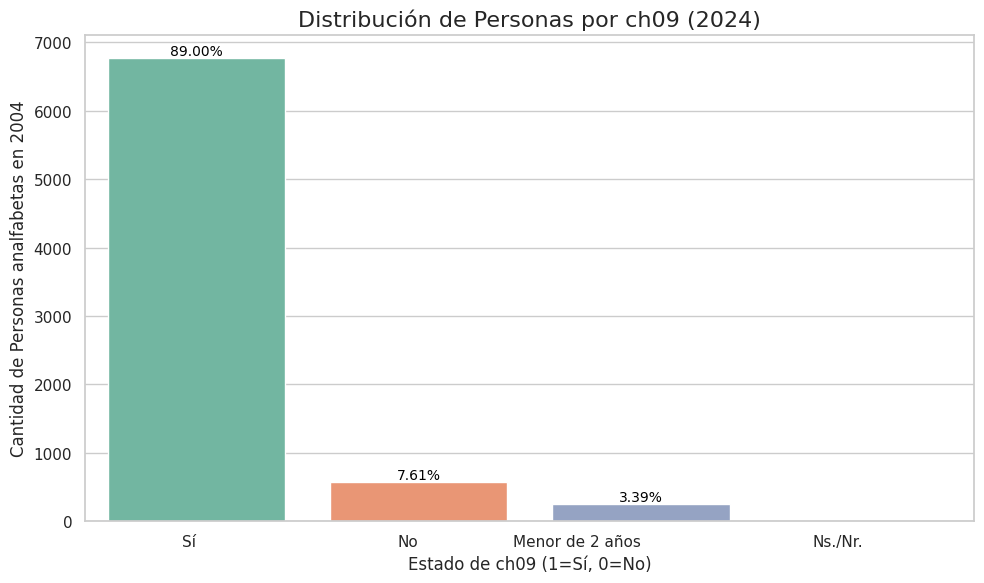

In [ ]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras con la columna corregida
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_merge04,
    x='ch09',
    order=df_merge04['ch09'].value_counts().index,
    palette='Set2'
)

# Calcular el porcentaje para cada categoría
total = len(df_merge04)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Añadir título y etiquetas
plt.title('Distribución de Personas por ch09 (2024)', fontsize=16)
plt.xlabel('Estado de ch09 (1=Sí, 0=No)', fontsize=12)
plt.ylabel('Cantidad de Personas analfabetas en 2004', fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-57-0cd5e9c488a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


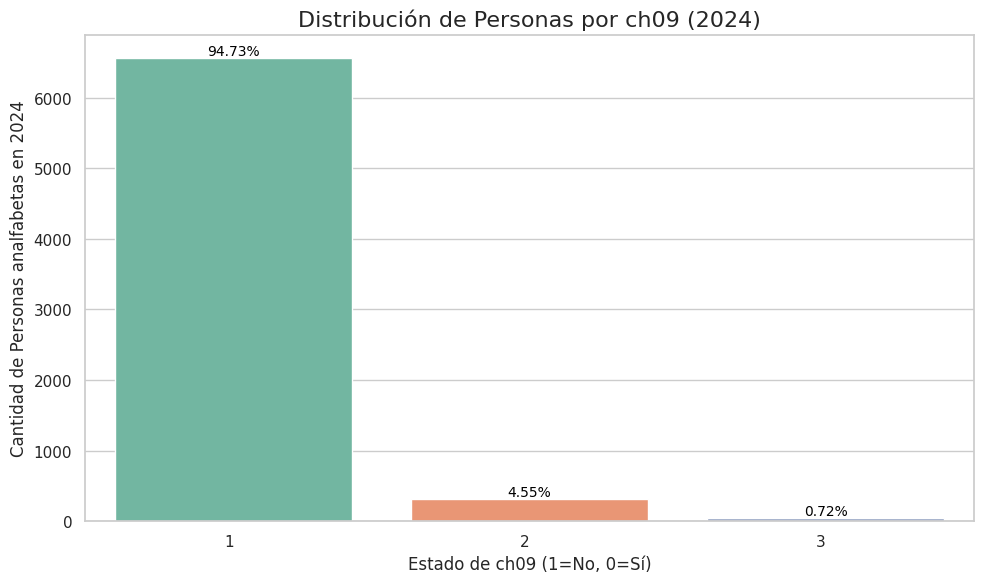

In [ ]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras con etiquetas corregidas
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_merge24,
    x='ch09',
    order=df_merge24['ch09'].value_counts().index,
    palette='Set2'
)

# Calcular el porcentaje para cada categoría
total = len(df_merge24)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Añadir título y etiquetas
plt.title('Distribución de Personas por ch09 (2024)', fontsize=16)
plt.xlabel('Estado de ch09 (1=No, 0=Sí)', fontsize=12)
plt.ylabel('Cantidad de Personas analfabetas en 2024', fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### subsidio o ayuda social (V5)

<ipython-input-58-43675af6c5e8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_merge04, x='v5', order=df_merge04['v5'].value_counts().index, palette='Set2')


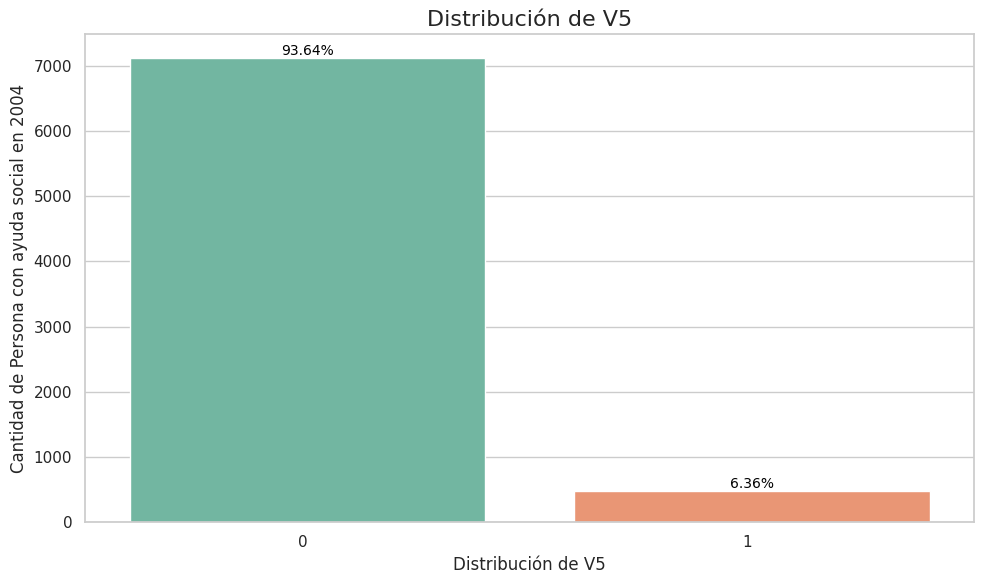

In [ ]:
# 2004
# Establecer estilo visual
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_merge04, x='v5', order=df_merge04['v5'].value_counts().index, palette='Set2')

# Calcular el porcentaje para cada categoría
total = len(df_merge04)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Añadir título y etiquetas
plt.title('Distribución de V5', fontsize=16)
plt.xlabel('Distribución de V5', fontsize=12)
plt.ylabel('Cantidad de Persona con ayuda social en 2004', fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=0, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-59-52b99bcc7212>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_merge24, x='v5', order=df_merge04['v5'].value_counts().index, palette='Set2')


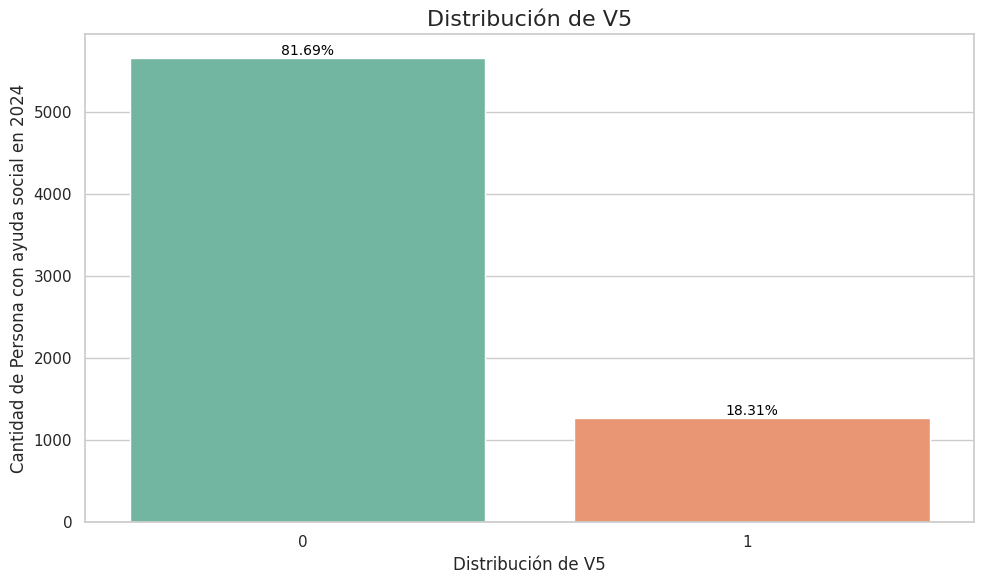

In [ ]:
 2024
# Establecer estilo visual
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_merge24, x='v5', order=df_merge04['v5'].value_counts().index, palette='Set2')

# Calcular el porcentaje para cada categoría
total = len(df_merge24)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Añadir título y etiquetas
plt.title('Distribución de V5', fontsize=16)
plt.xlabel('Distribución de V5', fontsize=12)
plt.ylabel('Cantidad de Persona con ayuda social en 2024', fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=0, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Otros análisis

In [ ]:
# 2004
# Crear una tabla de contingencia (contando combinaciones de nivel_ed y v5)
tabla_contingencia = pd.crosstab(df_merge04['nivel_ed'], df_merge04['v5'])

# Mostrar la tabla de contingencia
print(tabla_contingencia)
print("\n")

# Calcular la probabilidad de que una persona en cada nivel educativo tenga 'Sí' en v5
probabilidad_si = tabla_contingencia[1] / tabla_contingencia.sum(axis=1)

# Calcular la probabilidad de que una persona en cada nivel educativo tenga 'No' en v5
probabilidad_no = tabla_contingencia[0] / tabla_contingencia.sum(axis=1)

# Mostrar las probabilidades
print("Probabilidad de 'Sí' en subsidios por nivel educativo 2004:")
print(probabilidad_si)
print("\n")

print("\nProbabilidad de 'No' en subsidios por nivel educativo 2004:")
print(probabilidad_no)


v5                                    0    1
nivel_ed                                    
Primaria Incompleta                1255  142
Primaria Completa                  1520  105
Secundaria Incompleta              1272   94
Secundaria Completa                1029   50
Superior Universitaria Incompleta   687   12
Superior Universitaria Completa     638    6
Sin instrucción                     723   75


Probabilidad de 'Sí' en subsidios por nivel educativo 2004:
nivel_ed
Primaria Incompleta                  0.101646
Primaria Completa                    0.064615
Secundaria Incompleta                0.068814
Secundaria Completa                  0.046339
Superior Universitaria Incompleta    0.017167
Superior Universitaria Completa      0.009317
Sin instrucción                      0.093985
dtype: float64



Probabilidad de 'No' en subsidios por nivel educativo 2004:
nivel_ed
Primaria Incompleta                  0.898354
Primaria Completa                    0.935385
Secundaria Incompleta  

In [ ]:
# 2024
# Crear una tabla de contingencia (contando combinaciones de nivel_ed y v5)
tabla_contingencia = pd.crosstab(df_merge24['nivel_ed'], df_merge04['v5'])

# Mostrar la tabla de contingencia
print(tabla_contingencia)
print("\n")

# Calcular la probabilidad de que una persona en cada nivel educativo tenga 'Sí' en v5
probabilidad_si = tabla_contingencia[1] / tabla_contingencia.sum(axis=1)

# Calcular la probabilidad de que una persona en cada nivel educativo tenga 'No' en v5
probabilidad_no = tabla_contingencia[0] / tabla_contingencia.sum(axis=1)

# Mostrar las probabilidades
print("Probabilidad de 'Sí' en subsidios por nivel educativo 2024:")
print(probabilidad_si)
print("\n")

print("\nProbabilidad de 'No' en subsidios por nivel educativo 2024:")
print(probabilidad_no)

print("\n")
print("Diccionario de valores numéricos:")
print("1 = Primaria Incompleta")
print("2 = Primaria Completa")
print("3 = Secundaria Incompleta")
print("4 = Secundaria Completa")
print("5 = Superior Universitaria Incompleta")
print("6 = Superior Universitaria Completa")
print("7 = Sin instrucción")

v5           0   1
nivel_ed          
1          792  67
2          690  51
3         1301  92
4         1498  99
5          814  55
6         1033  68
7          339  26


Probabilidad de 'Sí' en subsidios por nivel educativo 2024:
nivel_ed
1    0.077998
2    0.068826
3    0.066045
4    0.061991
5    0.063291
6    0.061762
7    0.071233
dtype: float64



Probabilidad de 'No' en subsidios por nivel educativo 2024:
nivel_ed
1    0.922002
2    0.931174
3    0.933955
4    0.938009
5    0.936709
6    0.938238
7    0.928767
dtype: float64


Diccionario de valores numéricos:
1 = Primaria Incompleta
2 = Primaria Completa
3 = Secundaria Incompleta
4 = Secundaria Completa
5 = Superior Universitaria Incompleta
6 = Superior Universitaria Completa
7 = Sin instrucción


# PARTE 2: Clasificación y regularización

## Ejercicio 1

### Encoding

In [ ]:
# Columna llamada "desocupado" para analisis posterior
df_merge04["desocupado"] = (df_merge04["estado"] == "Desocupado").astype(int)
df_merge04["desocupado"].unique()

# Contar la cantidad de personas desocupadas en 2004
cantidad_desocupados = (df_merge04["desocupado"] == 1).sum()
print(f"Cantidad de personas desocupadas en 2004: {cantidad_desocupados}")

Cantidad de personas desocupadas en 2004: 527


In [ ]:
df_merge04_clasific = df_merge04.drop(["codusu","estado"], axis=1, errors='ignore')


In [ ]:
# Excluimos las variables numéricas y binarias
columnas_a_codificar = ['ch07',"ch09", 'ch08', 'nivel_ed', 'cat_inac', "iv1","iv2","iv6"]

# Aplicamos One-Hot Encoding solo a las columnas seleccionadas
df_merge_encoded04 = pd.get_dummies(df_merge04_clasific, columns=columnas_a_codificar, drop_first=False)

# Ver el resultado
print(df_merge_encoded04.head())

  ch04  ch06  v5  v6  v12  v15  ix_tot  iv5  iv8  iv12_3  ... iv2_16.0  \
0    0    80   0   0    0    0     2.0    1    1       0  ...    False   
1    1    75   0   0    0    0     2.0    1    1       0  ...    False   
2    0    79   0   0    0    0     1.0    1    1       0  ...    False   
3    0    72   0   0    0    0     6.0    1    1       0  ...    False   
4    1    66   0   0    0    0     6.0    1    1       0  ...    False   

  iv2_21.0 iv2_31.0  iv2_33.0  iv2_41.0  iv2_Ns./Nr.  iv6_0.0  \
0    False    False     False     False        False    False   
1    False    False     False     False        False    False   
2    False    False     False     False        False    False   
3    False    False     False     False        False    False   
4    False    False     False     False        False    False   

   iv6_Por cañería dentro de la vivienda  \
0                                   True   
1                                   True   
2                               

In [ ]:
# Ver todas las columnas después de One-Hot Encoding
print(df_merge_encoded04.columns)


Index(['ch04', 'ch06', 'v5', 'v6', 'v12', 'v15', 'ix_tot', 'iv5', 'iv8',
       'iv12_3', 'ii1', 'nivel_ed_numeric04', 'nivel_ed_maximo04',
       'indice_ayuda_externa04', 'menor_de_16', 'cantidad_menores_16',
       'desocupado', 'ch07_Unido', 'ch07_Casado', 'ch07_Separado o divorciado',
       'ch07_Viudo', 'ch07_Soltero', 'ch07_Ns./Nr.', 'ch09_Sí', 'ch09_No',
       'ch09_Menor de 2 años', 'ch09_Ns./Nr.',
       'ch08_Obra social (incluye PAMI)',
       'ch08_Mutual/Prepaga/Servicio de emergencia',
       'ch08_Planes y seguros públicos', 'ch08_No paga ni le descuentan',
       'ch08_Ns./Nr.',
       'ch08_Obra social y mutual/prepaga/servicio de emergencia',
       'ch08_Obra social y planes y seguros públicos',
       'ch08_Mutual/prepaga/servicio de emergencia/planes y seguros públi',
       'ch08_Obra social, mutual/prepaga/servicio de emergencia y planes',
       'nivel_ed_Primaria Incompleta', 'nivel_ed_Primaria Completa',
       'nivel_ed_Secundaria Incompleta', 'nivel_ed_Se

In [ ]:
# Columna llamada "desocupado" para analisis posterior
df_merge24["desocupado"] = (df_merge24["estado"] == 2).astype(int)
df_merge24["desocupado"].unique()

# Contar la cantidad de personas desocupadas en 2004
cantidad_desocupados = (df_merge24["desocupado"] == 1).sum()
print(f"Cantidad de personas desocupadas en 2024: {cantidad_desocupados}")

Cantidad de personas desocupadas en 2024: 311


In [ ]:
df_merge24_clasific = df_merge24.drop(["codusu","estado"], axis=1, errors='ignore')

In [ ]:
# Excluimos las variables numéricas y binarias

# Aplicamos One-Hot Encoding solo a las columnas seleccionadas (excluyendo 'ch06')
df_merge_encoded24 = pd.get_dummies(df_merge24_clasific, columns=columnas_a_codificar, drop_first=False)

# Ver el resultado
print(df_merge_encoded24.head())

   ch04  ch06  v5  v6  v12  v15  ix_tot  iv5  iv8  iv12_3  ...  iv2_3  iv2_4  \
0     1    57   0   0    0    0       3    1    1       0  ...  False  False   
1     0    52   0   0    0    0       3    1    1       0  ...  False  False   
2     1    22   0   0    0    0       3    1    1       0  ...  False  False   
3     0    52   0   0    0    0       1    1    1       0  ...  False   True   
4     0    75   0   0    0    0       1    1    1       0  ...   True  False   

   iv2_5  iv2_6  iv2_7  iv2_8  iv2_99  iv6_1  iv6_2  iv6_3  
0   True  False  False  False   False   True  False  False  
1   True  False  False  False   False   True  False  False  
2   True  False  False  False   False   True  False  False  
3  False  False  False  False   False   True  False  False  
4  False  False  False  False   False   True  False  False  

[5 rows x 65 columns]


### Partimos Bases

In [ ]:
df_merge_encoded04.columns

Index(['ch04', 'ch06', 'v5', 'v6', 'v12', 'v15', 'ix_tot', 'iv5', 'iv8',
       'iv12_3', 'ii1', 'nivel_ed_numeric04', 'nivel_ed_maximo04',
       'indice_ayuda_externa04', 'menor_de_16', 'cantidad_menores_16',
       'desocupado', 'ch07_Unido', 'ch07_Casado', 'ch07_Separado o divorciado',
       'ch07_Viudo', 'ch07_Soltero', 'ch07_Ns./Nr.', 'ch09_Sí', 'ch09_No',
       'ch09_Menor de 2 años', 'ch09_Ns./Nr.',
       'ch08_Obra social (incluye PAMI)',
       'ch08_Mutual/Prepaga/Servicio de emergencia',
       'ch08_Planes y seguros públicos', 'ch08_No paga ni le descuentan',
       'ch08_Ns./Nr.',
       'ch08_Obra social y mutual/prepaga/servicio de emergencia',
       'ch08_Obra social y planes y seguros públicos',
       'ch08_Mutual/prepaga/servicio de emergencia/planes y seguros públi',
       'ch08_Obra social, mutual/prepaga/servicio de emergencia y planes',
       'nivel_ed_Primaria Incompleta', 'nivel_ed_Primaria Completa',
       'nivel_ed_Secundaria Incompleta', 'nivel_ed_Se

In [ ]:
# Partimos la base año 2004

from sklearn.model_selection import train_test_split

# Separar la variable dependiente
y = df_merge_encoded04["desocupado"]
X = df_merge_encoded04.drop(columns=['desocupado'])

# Agregar la columna de unos para el intercepto en X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Dividir en entrenamiento (70%) y prueba (30%) con semilla 101
X_train04, X_test04, y_train04, y_test04 = train_test_split(X, y, test_size=0.3, random_state=101)

# Verificamos que se cumplan dimensiones

cantidad_total04 = X.shape[0]
cantidad_train04 = X_train04.shape[0]
cantidad_test04 = X_test04.shape[0]

print(f"Proporción entrenamiento 2004: {round(cantidad_train04 / cantidad_total04, 2)*100}%")
print(f"Proporción prueba 2004: {round(cantidad_test04  / cantidad_total04, 2)*100}%")


Proporción entrenamiento 2004: 70.0%
Proporción prueba 2004: 30.0%


In [ ]:
# Partimos la base año 2024

# Separar la variable dependiente
y = df_merge_encoded24["desocupado"]
X = df_merge_encoded24.drop(columns=['desocupado'])

# Agregar la columna de unos para el intercepto en X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Dividir en entrenamiento (70%) y prueba (30%) con semilla 101
X_train24, X_test24, y_train24, y_test24 = train_test_split(X, y, test_size=0.3, random_state=101)

# Verificamos que se cumplan dimensiones

cantidad_total24 = X.shape[0]
cantidad_train24 = X_train24.shape[0]
cantidad_test24 = X_test24.shape[0]

print(f"Proporción entrenamiento 2024: {round(cantidad_train24 / cantidad_total24, 2)*100}%")
print(f"Proporción prueba 2024: {round(cantidad_test24  / cantidad_total24, 2)*100}%")

Proporción entrenamiento 2024: 70.0%
Proporción prueba 2024: 30.0%




## Ejercicio 4

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# Verifica la distribución de clases en los datos
print(y_train04.value_counts())
print(y_test04.value_counts())

desocupado
0    4931
1     394
Name: count, dtype: int64
desocupado
0    2150
1     133
Name: count, dtype: int64


In [ ]:
# Crear el escalador
sc = StandardScaler()

# Escalar sin usar índices ni columnas
X_train04_sc = pd.DataFrame(sc.fit_transform(X_train04))
X_test04_sc = pd.DataFrame(sc.transform(X_test04))


--- Regresión Logística con Penalización L1 ---
Accuracy: 0.9382
AUC: 0.8634
Matriz de Confusión:
[[2139   11]
 [ 130    3]]


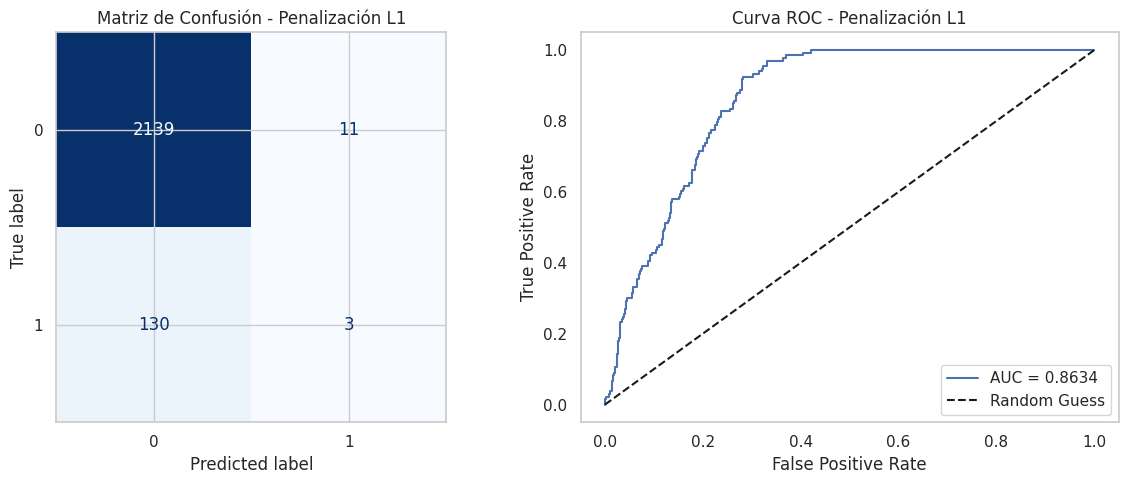


--- Regresión Logística con Penalización L2 ---
Accuracy: 0.9382
AUC: 0.8621
Matriz de Confusión:
[[2139   11]
 [ 130    3]]


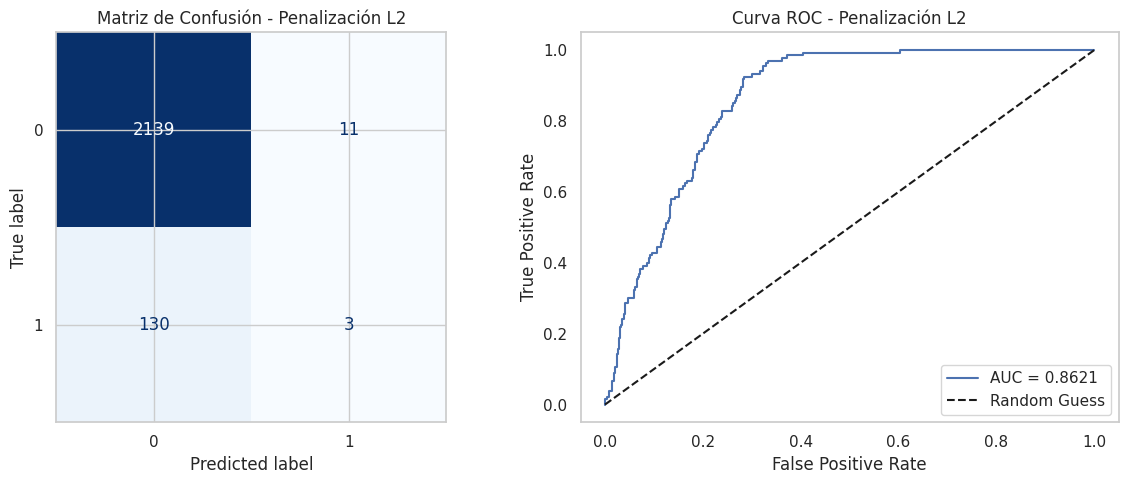

In [ ]:

# Parámetros comunes
penalizaciones = ['l1', 'l2']  # L1 y L2
lambda_value = 1  # Corresponde a 'C = 1/lambda' en scikit-learn

for penalty in penalizaciones:
    print(f"\n--- Regresión Logística con Penalización {penalty.upper()} ---")

    # Crear y entrenar el modelo
    model04 = LogisticRegression(penalty=penalty, solver='liblinear', C=1/lambda_value, max_iter=1000)
    model04.fit(X_train04_sc, y_train04)

    # Predecir los valores en el conjunto de prueba
    y_pred04 = model04.predict(X_test04_sc)
    y_pred_prob04 = model04.predict_proba(X_test04_sc)[:, 1]

    # Calcular métricas
    acc = accuracy_score(y_test04, y_pred04)
    auc = roc_auc_score(y_test04, y_pred_prob04)
    cm = confusion_matrix(y_test04, y_pred04)

    # Imprimir métricas
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Matriz de Confusión:")
    print(cm)

    # Configurar la figura para mostrar gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de Confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model04.classes_)
    disp.plot(cmap='Blues', ax=axes[0], colorbar=False)
    axes[0].set_title(f"Matriz de Confusión - Penalización {penalty.upper()}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test04, y_pred_prob04)
    axes[1].plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"Curva ROC - Penalización {penalty.upper()}")
    axes[1].legend()
    axes[1].grid()

    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()


In [ ]:
# Crear el escalador
sc = StandardScaler()

# Escalar sin usar índices ni columnas
X_train24_sc = pd.DataFrame(sc.fit_transform(X_train24))
X_test24_sc = pd.DataFrame(sc.transform(X_test24))


--- Regresión Logística con Penalización L1 ---
Accuracy: 0.9548
AUC: 0.8871
Matriz de Confusión:
[[1984    0]
 [  94    0]]


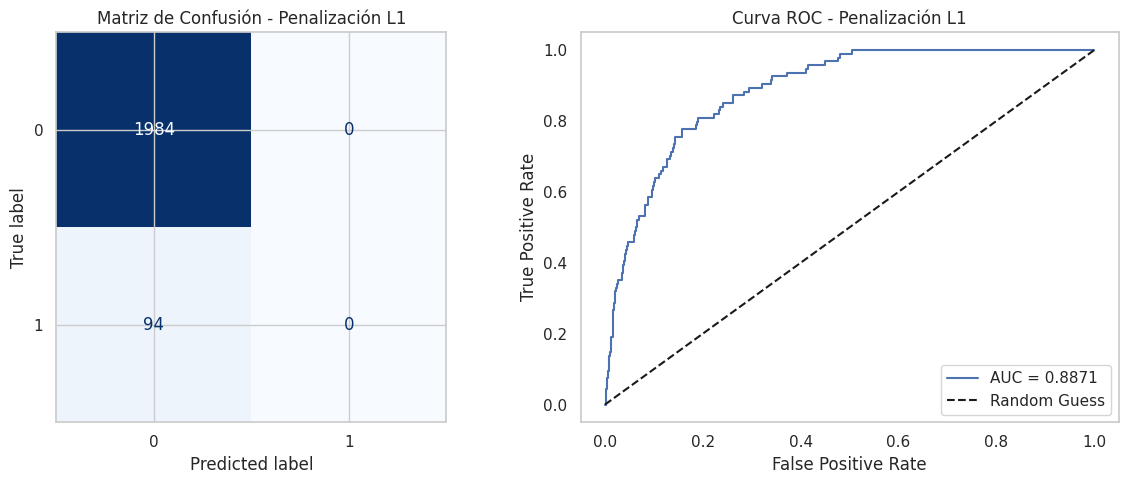


--- Regresión Logística con Penalización L2 ---
Accuracy: 0.9548
AUC: 0.8845
Matriz de Confusión:
[[1984    0]
 [  94    0]]


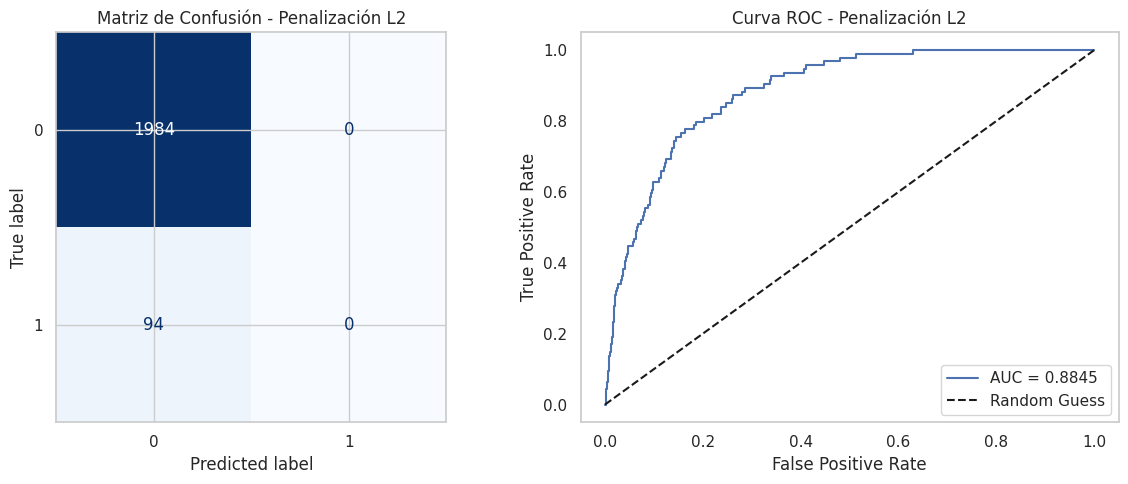

In [ ]:
# Parámetros comunes
penalizaciones = ['l1', 'l2']  # L1 y L2
lambda_value = 1

for penalty in penalizaciones:
    print(f"\n--- Regresión Logística con Penalización {penalty.upper()} ---")

    # Crear y entrenar el modelo
    model24 = LogisticRegression(penalty=penalty, solver='liblinear', C=1/lambda_value, max_iter=1000)
    model24.fit(X_train24_sc, y_train24)

    # Predecir los valores en el conjunto de prueba
    y_pred24 = model24.predict(X_test24)
    y_pred_prob24 = model24.predict_proba(X_test24_sc)[:, 1]

    # Calcular métricas
    acc = accuracy_score(y_test24, y_pred24)
    auc = roc_auc_score(y_test24, y_pred_prob24)
    cm = confusion_matrix(y_test24, y_pred24)

    # Imprimir métricas
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Matriz de Confusión:")
    print(cm)

    # Configurar la figura para gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de Confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model24.classes_)
    disp.plot(cmap='Blues', ax=axes[0], colorbar=False)
    axes[0].set_title(f"Matriz de Confusión - Penalización {penalty.upper()}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test24, y_pred_prob24)
    axes[1].plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"Curva ROC - Penalización {penalty.upper()}")
    axes[1].legend()
    axes[1].grid()

    # Ajustar el diseño y mostrar
    plt.tight_layout()
    plt.show()


## Ejercicio 5


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

#### 2004

In [ ]:
#2004

# λ (lambda)
lambdas = [10**n for n in range(-6, 6)]

# 10-fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Función para calcular el MSE en cada partición
def calcular_mse(estimator, X, y):
    scores = cross_val_score(estimator, X, y, cv=cv, scoring='neg_mean_squared_error')
    return -scores  # Cambiamos el signo porque scikit-learn devuelve MSE negativo

# creamos arrays para guardar resultados
mse_ridge04 = []
mse_lasso04 = []
proporcion_ceros_lasso04 = [] # cuantos coeficientes son cero

In [ ]:
# Iteramos sobre los valores de lambda
for lambda_value in lambdas:
    C = 1 / lambda_value  # Regularización inversamente proporcional a lambda

    # Ajuste con Ridge (L2)
    model_ridge = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    mse_ridge04.append(calcular_mse(model_ridge, X_train04_sc, y_train04))

    # Ajuste con LASSO (L1)
    model_lasso = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000)
    mse_lasso04.append(calcular_mse(model_lasso, X_train04_sc, y_train04))

    # Ajustamos el modelo para calcular la proporción de coeficientes cero (LASSO)
    model_lasso.fit(X_train04_sc, y_train04)
    proporciones_cero = np.mean(model_lasso.coef_ == 0)
    proporcion_ceros_lasso04.append(proporciones_cero)

# Selección del λ óptimo basado en el menor MSE promedio
mean_mse_ridge = [np.mean(mse) for mse in mse_ridge04]
mean_mse_lasso = [np.mean(mse) for mse in mse_lasso04]

lambda_opt_ridge = lambdas[np.argmin(mean_mse_ridge)]
lambda_opt_lasso = lambdas[np.argmin(mean_mse_lasso)]

# Resultados finales
print(f"λ óptimo para Ridge (L2): {lambda_opt_ridge}")
print(f"λ óptimo para LASSO (L1): {lambda_opt_lasso}")


λ óptimo para Ridge (L2): 10
λ óptimo para LASSO (L1): 1


<ipython-input-86-ecca2369a45b>:10: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=mse_ridge04, orient='v', palette=palette_ridge)
<ipython-input-86-ecca2369a45b>:18: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=mse_lasso04, orient='v', palette=palette_lasso)


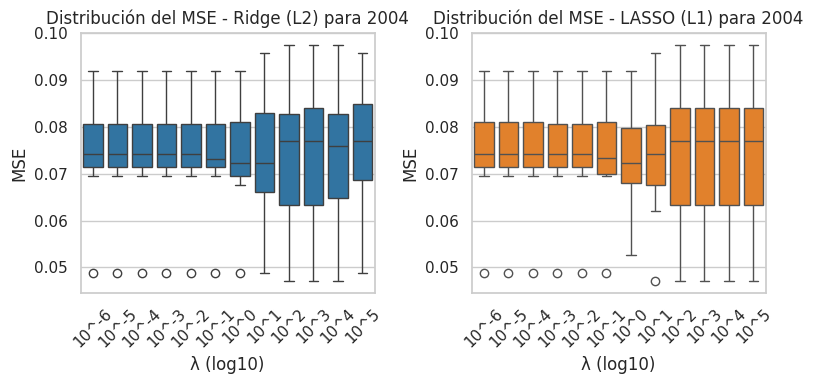

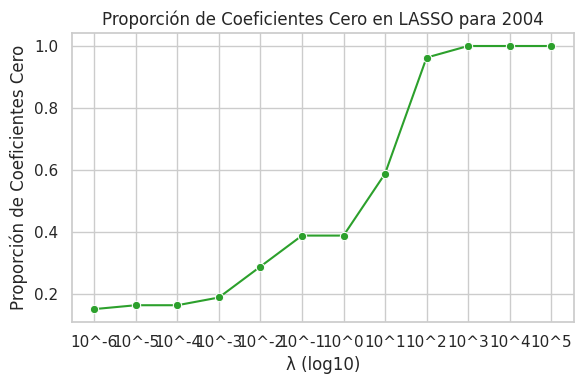

In [ ]:
# Generación de Box Plots para MSE
plt.figure(figsize=(8, 4))  # Aumentamos el tamaño general de la figura

# Paletas de colores personalizadas
palette_ridge = ['#1f77b4']
palette_lasso = ['#ff7f0e']

# Box plot para Ridge
plt.subplot(1, 2, 1)
sns.boxplot(data=mse_ridge04, orient='v', palette=palette_ridge)
plt.xticks(ticks=range(len(lambdas)), labels=[f"10^{n}" for n in range(-6, 6)], rotation=45)
plt.title("Distribución del MSE - Ridge (L2) para 2004")
plt.xlabel("λ (log10)")
plt.ylabel("MSE")

# Box plot para LASSO
plt.subplot(1, 2, 2)
sns.boxplot(data=mse_lasso04, orient='v', palette=palette_lasso)
plt.xticks(ticks=range(len(lambdas)), labels=[f"10^{n}" for n in range(-6, 6)], rotation=45)
plt.title("Distribución del MSE - LASSO (L1) para 2004")
plt.xlabel("λ (log10)")
plt.ylabel("MSE")

# Ajuste del layout para mejor presentación
plt.tight_layout()
plt.show()

# Generación de Line Plot para Proporción de Coeficientes Cero en LASSO
plt.figure(figsize=(6, 4))

# Usamos un color personalizado para la línea
sns.lineplot(x=[f"10^{n}" for n in range(-6, 6)], y=proporcion_ceros_lasso04, marker='o', color='#2ca02c')  # Verde para LASSO
plt.title("Proporción de Coeficientes Cero en LASSO para 2004")
plt.xlabel("λ (log10)")
plt.ylabel("Proporción de Coeficientes Cero")
plt.grid(True)

# Ajuste del layout para el line plot
plt.tight_layout()
plt.show()


#### 2024

In [ ]:
# Valores de λ (lambda)
lambdas = [10**n for n in range(-6, 6)]

# 10-fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Función para calcular el MSE en cada partición
def calcular_mse(estimator, X, y):
    scores = cross_val_score(estimator, X, y, cv=cv, scoring='neg_mean_squared_error')
    return -scores  # Cambiamos el signo porque scikit-learn devuelve MSE negativo

# creamos arrays para guardar resultados
mse_ridge24 = []
mse_lasso24 = []
proporcion_ceros_lasso24 = [] # cuantos coeficientes son cero


In [ ]:
# Iteramos sobre los valores de lambda
for lambda_value in lambdas:
    C = 1 / lambda_value  # En LogisticRegression, C es el inverso de λ

    # Ajuste con Ridge (L2)
    model_ridge24 = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    mse_ridge24.append(calcular_mse(model_ridge24, X_train24_sc, y_train24))

    # Ajuste con LASSO (L1)
    model_lasso24 = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000)
    mse_lasso24.append(calcular_mse(model_lasso24, X_train24_sc, y_train24))

    # Ajustamos el modelo LASSO y calculamos la proporción de coeficientes cero
    model_lasso24.fit(X_train24_sc, y_train24)  # Sintaxis corregida
    proporciones_cero24 = np.mean(model_lasso24.coef_ == 0)
    proporcion_ceros_lasso24.append(proporciones_cero24)

# Selección del λ óptimo basado en el menor MSE promedio
mean_mse_ridge24 = [np.mean(mse) for mse in mse_ridge24]
mean_mse_lasso24 = [np.mean(mse) for mse in mse_lasso24]

lambda_opt_ridge24 = lambdas[np.argmin(mean_mse_ridge24)]
lambda_opt_lasso24 = lambdas[np.argmin(mean_mse_lasso24)]

# Resultados finales
print(f"λ óptimo para Ridge (L2): {lambda_opt_ridge24}")
print(f"λ óptimo para LASSO (L1): {lambda_opt_lasso24}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


λ óptimo para Ridge (L2): 100
λ óptimo para LASSO (L1): 10


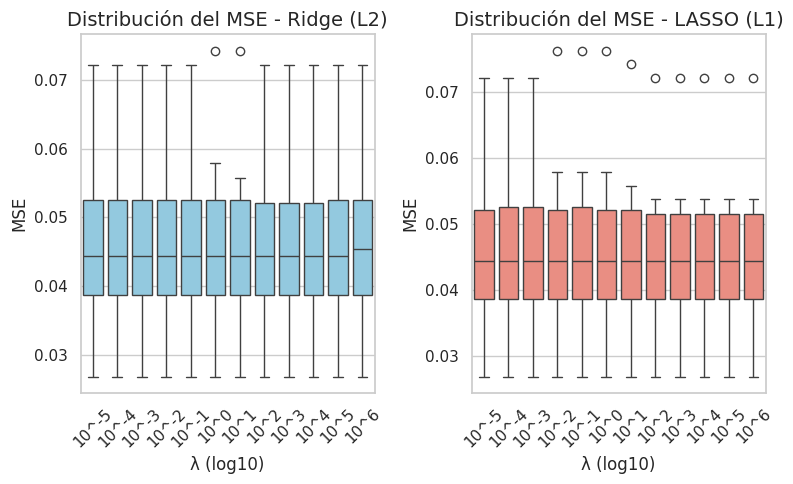

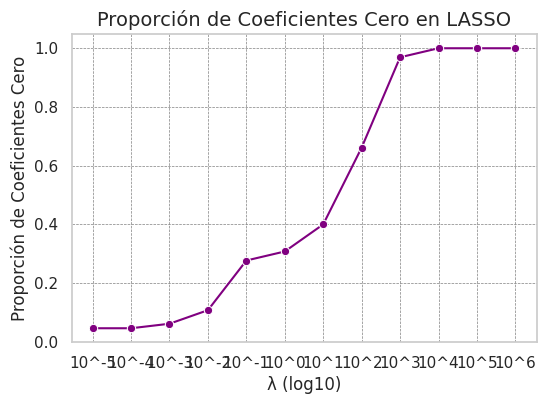

In [ ]:
# Colores personalizados
ridge_color = "skyblue"
lasso_color = "salmon"
line_color = "purple"

# Generación de Box Plots para MSE
plt.figure(figsize=(8, 5))

# Box plot para Ridge
plt.subplot(1, 2, 1)
sns.boxplot(data=mse_ridge24, orient='v', color=ridge_color)
plt.xticks(ticks=range(len(lambdas)), labels=[f"10^{n}" for n in range(-5, 7)], rotation=45)
plt.title("Distribución del MSE - Ridge (L2)", fontsize=14)
plt.xlabel("λ (log10)", fontsize=12)
plt.ylabel("MSE", fontsize=12)

# Box plot para LASSO
plt.subplot(1, 2, 2)
sns.boxplot(data=mse_lasso24, orient='v', color=lasso_color)
plt.xticks(ticks=range(len(lambdas)), labels=[f"10^{n}" for n in range(-5, 7)], rotation=45)
plt.title("Distribución del MSE - LASSO (L1)", fontsize=14)
plt.xlabel("λ (log10)", fontsize=12)
plt.ylabel("MSE", fontsize=12)

plt.tight_layout()
plt.show()

# Generación de Line Plot para Proporción de Coeficientes Cero en LASSO
plt.figure(figsize=(6, 5))
sns.lineplot(x=[f"10^{n}" for n in range(-5, 7)], y=proporcion_ceros_lasso24, marker='o', color=line_color)
plt.title("Proporción de Coeficientes Cero en LASSO", fontsize=14)
plt.xlabel("λ (log10)", fontsize=12)
plt.ylabel("Proporción de Coeficientes Cero", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


## Ejercicio 6

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
# Entrenar el modelo Lasso con el λ óptimo (suponiendo que ya tienes lambda_opt_lasso24)
model_lasso04 = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso, solver='liblinear', max_iter=1000)
model_lasso04.fit(X_train04_sc, y_train04)  # Entrenamos el modelo

# Variables con coeficiente 0 para LASSO
var_lasso = []
variables_cero = X_train04_sc.columns[model_lasso04.coef_[0] == 0]  # Accedemos a los coeficientes de model_lasso24
var_lasso.append(variables_cero)  # Almacenamos las variables con coeficiente 0

# Crear el DataFrame con las características y sus coeficientes
coeficientes_finales = pd.DataFrame({
    'feature': X_train04_sc.columns,
    'coeficiente': model_lasso04.coef_[0]  # Usamos los coeficientes de model_lasso24
})

# Mostrar las features con coeficiente distinto de cero
features_no_nulas = coeficientes_finales[coeficientes_finales['coeficiente'] != 0]
print(f"El modelo final cuenta con: {features_no_nulas.shape[0]} features con coeficiente distinto de cero.")

# Mostrar el DataFrame de coeficientes
print(coeficientes_finales)

# Variables con coeficiente 0 para LASSO
variables_cero = X_train04_sc.columns[model_lasso04.coef_[0] == 0]  # Identificamos las variables con coeficiente 0

# Mostrar las variables descartadas por Lasso
print(f"Las variables descartadas por Lasso (coeficiente igual a 0) son: ")
print(variables_cero)

# Variables con coeficiente 0 para LASSO
variables_cero = X_train04_sc.columns[model_lasso04.coef_[0] == 0]  # Identificamos las variables con coeficiente 0

# Contar el número de variables descartadas
num_variables_descartadas = len(variables_cero)

# Mostrar la cantidad de variables descartadas
print(f"Se han descartado {num_variables_descartadas} variables por Lasso.")


El modelo final cuenta con: 49 features con coeficiente distinto de cero.
    feature  coeficiente
0         0     0.000000
1         1     0.280743
2         2    -0.278660
3         3     0.065278
4         4     0.000000
..      ...          ...
75       75     0.000000
76       76    -0.164769
77       77    -0.108633
78       78     0.003080
79       79     0.000000

[80 rows x 2 columns]
Las variables descartadas por Lasso (coeficiente igual a 0) son: 
Index([ 0,  4, 12, 18, 22, 25, 26, 28, 31, 33, 34, 35, 40, 42, 44, 45, 46, 47,
       48, 49, 50, 52, 55, 57, 61, 70, 71, 73, 74, 75, 79],
      dtype='int64')
Se han descartado 31 variables por Lasso.


In [ ]:
# Índices de las columnas descartadas por LASSO (nuevo conjunto de índices)
indices_descartados = [0, 4, 12, 18, 22, 25, 26, 28, 31, 33, 34, 35, 40, 42,
                       44, 45, 46, 47, 48, 49, 50, 52, 55, 57, 61, 70, 71, 73,
                       74, 75, 79]

# Obtener las columnas correspondientes a esos índices
columnas_descartadas = df_merge_encoded04.columns[indices_descartados]

# Mostrar las columnas descartadas
print("Las columnas descartadas son:")
print(columnas_descartadas)

# Contar el número de variables descartadas
num_variables_descartadas = len(columnas_descartadas)

# Mostrar la cantidad de variables descartadas
print(f"Se han descartado {num_variables_descartadas} variables por Lasso.")


Las columnas descartadas son:
Index(['ch04', 'v12', 'nivel_ed_maximo04', 'ch07_Casado', 'ch07_Ns./Nr.',
       'ch09_Menor de 2 años', 'ch09_Ns./Nr.',
       'ch08_Mutual/Prepaga/Servicio de emergencia', 'ch08_Ns./Nr.',
       'ch08_Obra social y planes y seguros públicos',
       'ch08_Mutual/prepaga/servicio de emergencia/planes y seguros públi',
       'ch08_Obra social, mutual/prepaga/servicio de emergencia y planes',
       'nivel_ed_Superior Universitaria Incompleta',
       'nivel_ed_Sin instrucción', 'cat_inac_Jubilado/pensionado',
       'cat_inac_Rentista', 'cat_inac_Estudiante', 'cat_inac_Ama de casa',
       'cat_inac_Menor de 6 años', 'cat_inac_Discapacitado', 'cat_inac_Otros',
       'iv1_Departamento', 'iv1_Local no construido para habitación',
       'iv2_0.0', 'iv2_4.0', 'iv2_16.0', 'iv2_21.0', 'iv2_33.0', 'iv2_41.0',
       'iv2_Ns./Nr.', 'iv6_Fuera del terreno'],
      dtype='object')
Se han descartado 31 variables por Lasso.


###2024

In [ ]:
# Entrenar el modelo Lasso con el λ óptimo (suponiendo que ya tienes lambda_opt_lasso24)
model_lasso24 = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso24, solver='liblinear', max_iter=1000)
model_lasso24.fit(X_train24_sc, y_train24)  # Entrenamos el modelo

# Variables con coeficiente 0 para LASSO
var_lasso = []
variables_cero = X_train24_sc.columns[model_lasso24.coef_[0] == 0]  # Accedemos a los coeficientes de model_lasso24
var_lasso.append(variables_cero)  # Almacenamos las variables con coeficiente 0

# Crear el DataFrame con las características y sus coeficientes
coeficientes_finales = pd.DataFrame({
    'feature': X_train24_sc.columns,
    'coeficiente': model_lasso24.coef_[0]  # Usamos los coeficientes de model_lasso24
})

# Mostrar las features con coeficiente distinto de cero
features_no_nulas = coeficientes_finales[coeficientes_finales['coeficiente'] != 0]
print(f"El modelo final cuenta con: {features_no_nulas.shape[0]} features con coeficiente distinto de cero.")

# Mostrar el DataFrame de coeficientes
print(coeficientes_finales)

# Variables con coeficiente 0 para LASSO
variables_cero = X_train24_sc.columns[model_lasso24.coef_[0] == 0]  # Identificamos las variables con coeficiente 0

# Mostrar las variables descartadas por Lasso
print(f"Las variables descartadas por Lasso (coeficiente igual a 0) son: ")
print(variables_cero)

# Variables con coeficiente 0 para LASSO
variables_cero = X_train24_sc.columns[model_lasso24.coef_[0] == 0]  # Identificamos las variables con coeficiente 0

# Contar el número de variables descartadas
num_variables_descartadas = len(variables_cero)

# Mostrar la cantidad de variables descartadas
print(f"Se han descartado {num_variables_descartadas} variables por Lasso.")


El modelo final cuenta con: 22 features con coeficiente distinto de cero.
    feature  coeficiente
0         0     0.000000
1         1    -0.120293
2         2    -0.117731
3         3     0.000000
4         4     0.000000
..      ...          ...
60       60     0.000000
61       61     0.000000
62       62     0.000000
63       63     0.042612
64       64     0.000000

[65 rows x 2 columns]
Las variables descartadas por Lasso (coeficiente igual a 0) son: 
Index([ 0,  3,  4,  6,  7,  8,  9, 11, 12, 13, 14, 15, 18, 19, 22, 23, 24, 25,
       26, 27, 30, 31, 34, 38, 40, 41, 42, 43, 44, 45, 46, 47, 50, 53, 55, 56,
       57, 58, 59, 60, 61, 62, 64],
      dtype='int64')
Se han descartado 43 variables por Lasso.


In [ ]:
# Índices de las columnas descartadas por LASSO
indices_descartados = [0, 9, 12, 13, 14, 18, 22, 23, 24, 26, 27, 30, 31, 34,
                       40, 41, 42, 43, 44, 45, 46, 47, 54, 56, 58, 62]

# Obtener las columnas correspondientes a esos índices
columnas_descartadas = df_merge_encoded24.columns[indices_descartados]

# Mostrar las columnas descartadas
print("Las columnas descartadas son:")
print(columnas_descartadas)


Las columnas descartadas son:
Index(['ch04', 'iv12_3', 'nivel_ed_maximo24', 'indice_ayuda_externa24',
       'menor_de_16', 'ch07_2', 'ch09_1', 'ch09_2', 'ch09_3', 'ch08_2',
       'ch08_3', 'ch08_13', 'ch08_23', 'nivel_ed_3', 'cat_inac_1',
       'cat_inac_2', 'cat_inac_3', 'cat_inac_4', 'cat_inac_5', 'cat_inac_6',
       'cat_inac_7', 'iv1_1', 'iv2_2', 'iv2_4', 'iv2_6', 'iv6_1'],
      dtype='object')



##Ejercicio 7


###2004


In [ ]:
# Aquí es donde calculas las predicciones para los datos de test (que ya has hecho en tu código original):
# Se crea el modelo final con los valores óptimos de λ y luego se hace la predicción.

# Ridge con el λ óptimo
model_ridge_opt = LogisticRegression(penalty='l2', C=1/lambda_opt_ridge, solver='saga', max_iter=1000)
model_ridge_opt.fit(X_train04_sc, y_train04)
ridge_pred_2004 = model_ridge_opt.predict(X_test04_sc)

# Lasso con el λ óptimo
model_lasso_opt = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso, solver='saga', max_iter=1000)
model_lasso_opt.fit(X_train04_sc, y_train04)
lasso_pred_2004 = model_lasso_opt.predict(X_test04_sc)

# Cálculo del MSE en el conjunto de prueba
from sklearn.metrics import mean_squared_error

print("Error cuadrático medio con Ridge 2004: ", mean_squared_error(y_test04, ridge_pred_2004))
print("Error cuadrático medio con Lasso 2004: ", mean_squared_error(y_test04, lasso_pred_2004))


Error cuadrático medio con Ridge 2004:  0.06044678055190539
Error cuadrático medio con Lasso 2004:  0.06132282084975909


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


###2024

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# λ óptimo para Ridge y Lasso (ya encontrados)
lambda_opt_ridge24 = 10  # λ óptimo para Ridge (L2)
lambda_opt_lasso24 = 1   # λ óptimo para Lasso (L1)

# Ridge con el λ óptimo
model_ridge_opt_24 = LogisticRegression(penalty='l2', C=1/lambda_opt_ridge24, solver='liblinear', max_iter=1000)
model_ridge_opt_24.fit(X_train24_sc, y_train24)
ridge_pred_2024 = model_ridge_opt_24.predict(X_test24_sc)

# Lasso con el λ óptimo
model_lasso_opt_24 = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso24, solver='liblinear', max_iter=1000)
model_lasso_opt_24.fit(X_train24_sc, y_train24)
lasso_pred_2024 = model_lasso_opt_24.predict(X_test24_sc)

# Cálculo del MSE en el conjunto de prueba utilizando el λ óptimo
print("Error cuadrático medio con Ridge 2024: ", mean_squared_error(y_test24, ridge_pred_2024))
print("Error cuadrático medio con Lasso 2024: ", mean_squared_error(y_test24, lasso_pred_2024))


Error cuadrático medio con Ridge 2024:  0.04571703561116458
Error cuadrático medio con Lasso 2024:  0.04571703561116458
